In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [68]:
df = pd.read_csv('https://cnecovid.isciii.es/covid19/resources/datos_provincias.csv')
df['provincia_iso'].fillna('NA', inplace = True)
ab = pd.read_csv(r'Spain_Abbrev.csv')
ab['Abbrev'].fillna('NA', inplace = True)

In [69]:
focus = df.copy().drop(['num_casos_prueba_pcr','num_casos_prueba_test_ac','num_casos_prueba_otras','num_casos_prueba_desconocida'], axis=1).set_index(['fecha'])
confirm = focus.groupby('provincia_iso').sum().T
print(confirm)

provincia_iso     A    AB   AL    AV      B    BA    BI    BU     C    CA  \
num_casos      5389  4848  846  2183  47762  1599  8686  3006  4754  1586   

provincia_iso  ...    SS     T   TE    TF    TO     V    VA    VI     Z    ZA  
num_casos      ...  2590  2352  676  1672  5210  7843  4872  3559  5145  1059  

[1 rows x 52 columns]


In [70]:
cols=['Province','COVID-free days','Total cases in last 14 days']
collect = []
for p in confirm.columns:
    n = focus[focus['provincia_iso']==p]
    p_long = ab.loc[ab['Abbrev']==p,'Province'].item()
    ave = n['num_casos']
    las = len(ave)-14
    last_forteen = ave[las:].sum()
    if last_forteen < 0:
        last_forteen = 0
    i = len(ave)-1
    c = 0
    while i > 0:
        if ave[i] <= 0:
            c = c + 1
        else:
            i = 0
        i = i - 1

    collect.append((p_long,
                   c,
                   last_forteen))
    
thr = pd.DataFrame(collect, columns=cols)
fin = thr.sort_values(['COVID-free days'], ascending=[False])
fin['week'] = fin['COVID-free days'].gt(13) 
tab = fin.sort_values(['week'], ascending=[False])
tab_t = tab[tab['week']==True]
tab_f = tab[tab['week']==False]
tab_f = tab_f.sort_values(['Total cases in last 14 days','COVID-free days'], ascending = [True,False])
tab_t = tab_t.sort_values(['COVID-free days','Total cases in last 14 days'], ascending = [False,True])
tab = tab_t.append(tab_f)
tab = tab.drop(['week'], axis=1)
tab.reset_index(drop=True, inplace=True)
tab.index += 1
tab.to_excel (r'C:\Users\vince\Desktop\/%s.xlsx'% ('spain-ranking'), index = True, header=True)

In [66]:
pd.options.display.max_rows = 9000
print(confirm.T)
print(ab)

               num_casos
provincia_iso           
A                   5389
AB                  4848
AL                   846
AV                  2183
B                  47762
BA                  1599
BI                  8686
BU                  3006
C                   4754
CA                  1586
CC                  3865
CE                   222
CO                  1705
CR                  8305
CS                  1823
CU                  1919
GC                   825
GI                  4864
GR                  3355
GU                  1906
H                    541
HU                  1477
J                   1919
L                   5095
LE                  3796
LO                  4024
LU                  1155
M                  72861
MA                  4179
ME                   141
MU                  2569
NA                  8049
O                   2443
OR                  1865
P                   1360
PM                  2395
PO                  3209
S                   2368


NameError: name 'is_null' is not defined

In [60]:
is_NaN = focus.isnull()
row_has_NaN = is_NaN.any(axis=1)
#rows_with_NaN = df[row_has_NaN]
print(row_has_NaN)

fecha
2020-01-31    False
2020-01-31    False
2020-01-31    False
2020-01-31    False
2020-01-31    False
2020-01-31    False
2020-01-31    False
2020-01-31    False
2020-01-31    False
2020-01-31    False
2020-01-31    False
2020-01-31    False
2020-01-31    False
2020-01-31    False
2020-01-31    False
2020-01-31    False
2020-01-31    False
2020-01-31    False
2020-01-31    False
2020-01-31    False
2020-01-31    False
2020-01-31    False
2020-01-31    False
2020-01-31    False
2020-01-31    False
2020-01-31    False
2020-01-31    False
2020-01-31    False
2020-01-31    False
2020-01-31    False
2020-01-31    False
2020-01-31     True
2020-01-31    False
2020-01-31    False
2020-01-31    False
2020-01-31    False
2020-01-31    False
2020-01-31    False
2020-01-31    False
2020-01-31    False
2020-01-31    False
2020-01-31    False
2020-01-31    False
2020-01-31    False
2020-01-31    False
2020-01-31    False
2020-01-31    False
2020-01-31    False
2020-01-31    False
2020-01-31    

49204


# Global

## Get data from GitHub

Use 3 dataframes to restore the data seperately. The output is the the update time, if should be one day ago (usually by morning EST, yesterday's full data is updated). If not, please wait until the output of this cell is yesterday

Latest update time is: _07_11


Latest update time is: _07_01
DatetimeIndex(['2020-02-24 18:00:00', '2020-02-25 18:00:00',
               '2020-02-26 18:00:00', '2020-02-27 18:00:00',
               '2020-02-28 18:00:00', '2020-02-29 17:00:00',
               '2020-03-01 17:00:00', '2020-03-02 18:00:00',
               '2020-03-03 18:00:00', '2020-03-04 17:00:00',
               ...
               '2020-06-21 17:00:00', '2020-06-22 17:00:00',
               '2020-06-23 17:00:00', '2020-06-24 17:00:00',
               '2020-06-25 17:00:00', '2020-06-26 17:00:00',
               '2020-06-27 17:00:00', '2020-06-28 17:00:00',
               '2020-06-29 17:00:00', '2020-06-30 17:00:00'],
              dtype='datetime64[ns]', name='data', length=128, freq=None)


Baden-Württemberg
Bayern
Berlin
Brandenburg
Bremen
Hamburg
Hessen
Mecklenburg-Vorpommern
Niedersachsen
Nordrhein-Westfalen
Rheinland-Pfalz
Saarland
Sachsen
Sachsen-Anhalt
Schleswig-Holstein
Thüringen


2020-01-26       0
2020-01-27       0
2020-01-28       0
2020-01-29       0
2020-01-30       0
2020-01-31       0
2020-02-01       0
2020-02-02       0
2020-02-03       0
2020-02-04       0
2020-02-05       0
2020-02-06       0
2020-02-07       0
2020-02-08       0
2020-02-09       0
2020-02-10       0
2020-02-11       0
2020-02-12       0
2020-02-13       0
2020-02-14       0
2020-02-15       0
2020-02-16       0
2020-02-17       0
2020-02-18       0
2020-02-19       0
2020-02-20       0
2020-02-21       0
2020-02-22       0
2020-02-23       0
2020-02-24       1
2020-02-25       2
2020-02-26       4
2020-02-27       3
2020-02-28       7
2020-02-29       2
2020-03-01       1
2020-03-02      10
2020-03-03      24
2020-03-04      38
2020-03-05      36
2020-03-06      50
2020-03-07      31
2020-03-08      19
2020-03-09      52
2020-03-10     118
2020-03-11     146
2020-03-12     188
2020-03-13     313
2020-03-14     326
2020-03-15     182
2020-03-16     431
2020-03-17     600
2020-03-18  

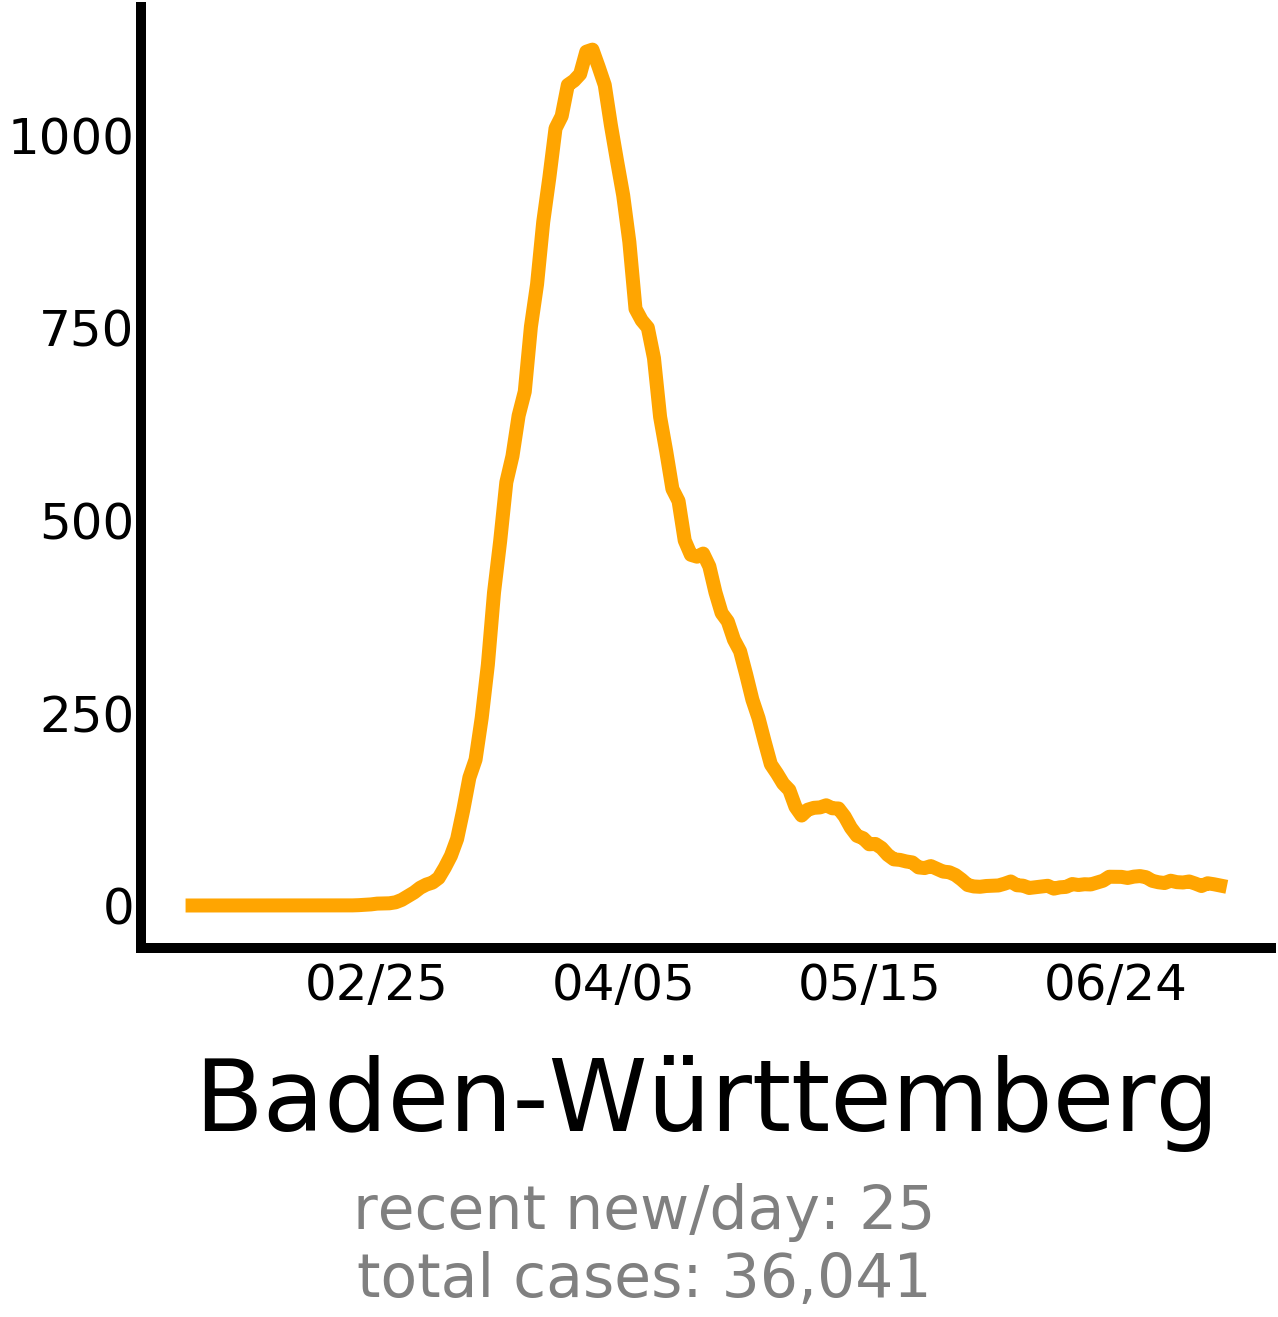

2020-01-26       0
2020-01-27       0
2020-01-28       2
2020-01-29       2
2020-01-30       0
2020-01-31       3
2020-02-01       0
2020-02-02       0
2020-02-03       1
2020-02-04       3
2020-02-05       0
2020-02-06       1
2020-02-07       1
2020-02-08       0
2020-02-09       0
2020-02-10       0
2020-02-11       2
2020-02-12       1
2020-02-13       0
2020-02-14       0
2020-02-15       0
2020-02-16       0
2020-02-17       0
2020-02-18       0
2020-02-19       0
2020-02-20       0
2020-02-21       0
2020-02-22       0
2020-02-23       0
2020-02-24       0
2020-02-25       0
2020-02-26       0
2020-02-27       1
2020-02-28       2
2020-02-29       2
2020-03-01       4
2020-03-02       6
2020-03-03       6
2020-03-04      10
2020-03-05      19
2020-03-06      51
2020-03-07      20
2020-03-08      20
2020-03-09      86
2020-03-10     111
2020-03-11     119
2020-03-12     137
2020-03-13     251
2020-03-14     230
2020-03-15     169
2020-03-16     270
2020-03-17     473
2020-03-18  

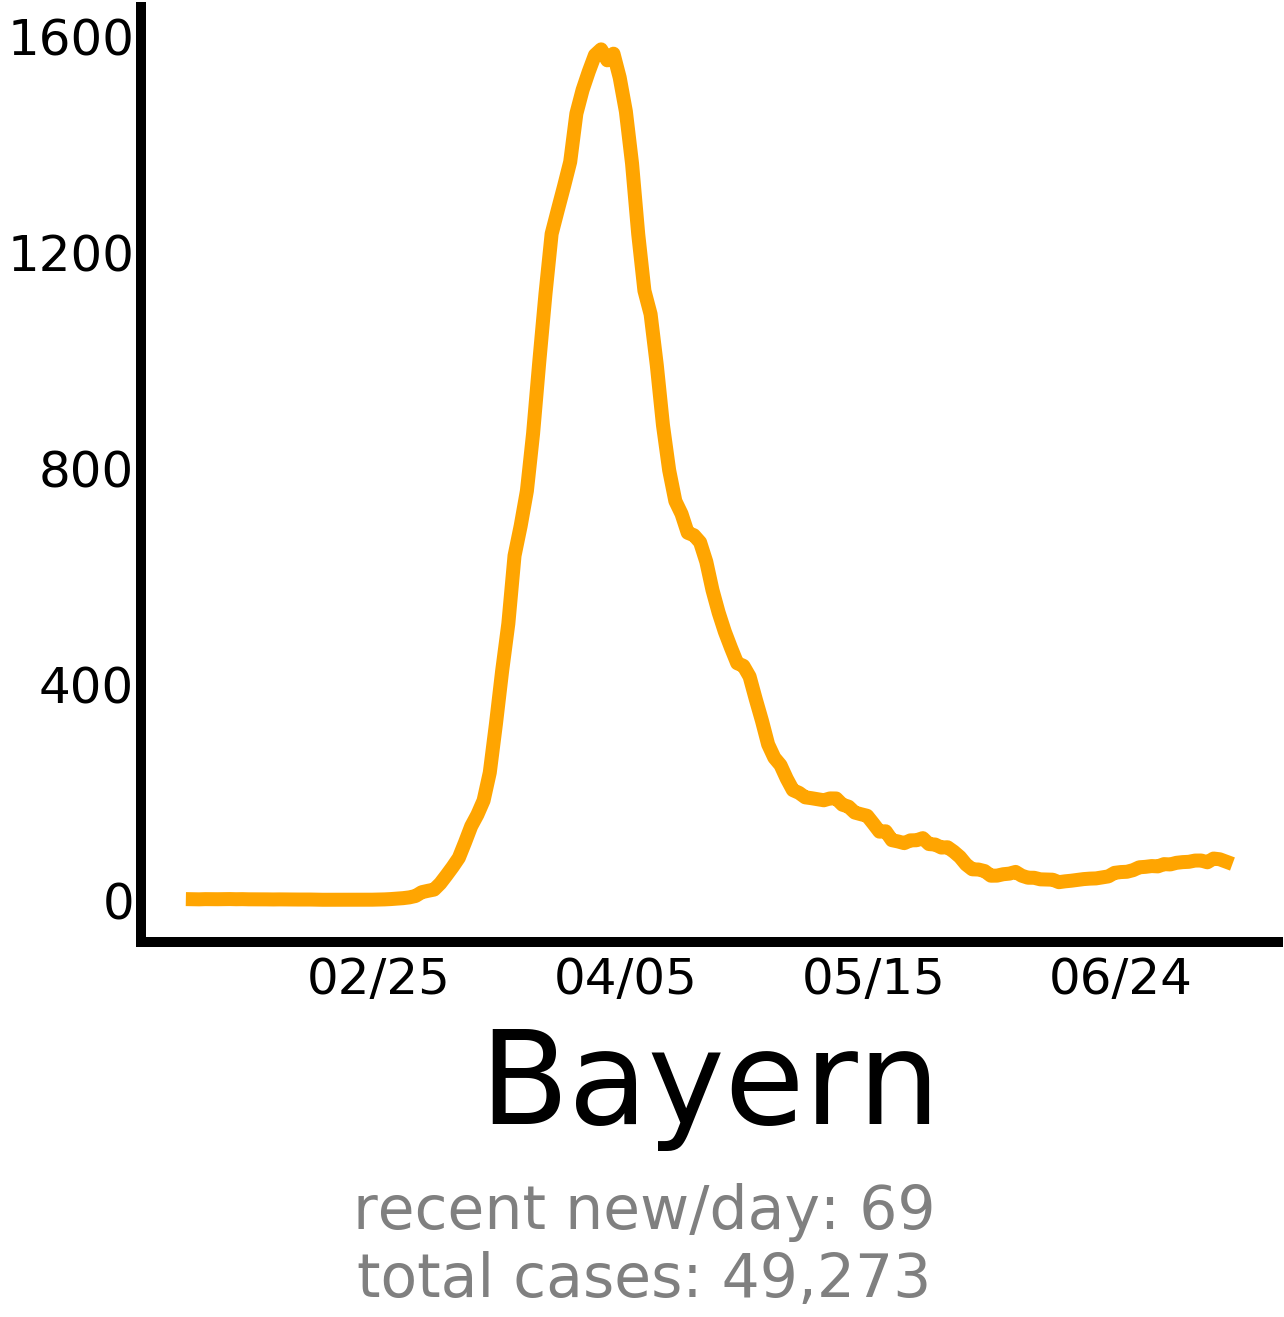

2020-01-26      0
2020-01-27      0
2020-01-28      0
2020-01-29      0
2020-01-30      0
2020-01-31      0
2020-02-01      0
2020-02-02      0
2020-02-03      0
2020-02-04      0
2020-02-05      0
2020-02-06      0
2020-02-07      0
2020-02-08      0
2020-02-09      0
2020-02-10      0
2020-02-11      0
2020-02-12      0
2020-02-13      0
2020-02-14      0
2020-02-15      0
2020-02-16      0
2020-02-17      0
2020-02-18      0
2020-02-19      0
2020-02-20      0
2020-02-21      0
2020-02-22      0
2020-02-23      0
2020-02-24      0
2020-02-25      0
2020-02-26      0
2020-02-27      0
2020-02-28      0
2020-02-29      0
2020-03-01      0
2020-03-02      0
2020-03-03      6
2020-03-04      3
2020-03-05     10
2020-03-06      5
2020-03-07      1
2020-03-08     11
2020-03-09     22
2020-03-10     34
2020-03-11     42
2020-03-12     47
2020-03-13     59
2020-03-14     29
2020-03-15     26
2020-03-16     63
2020-03-17     93
2020-03-18    146
2020-03-19    180
2020-03-20    170
2020-03-21

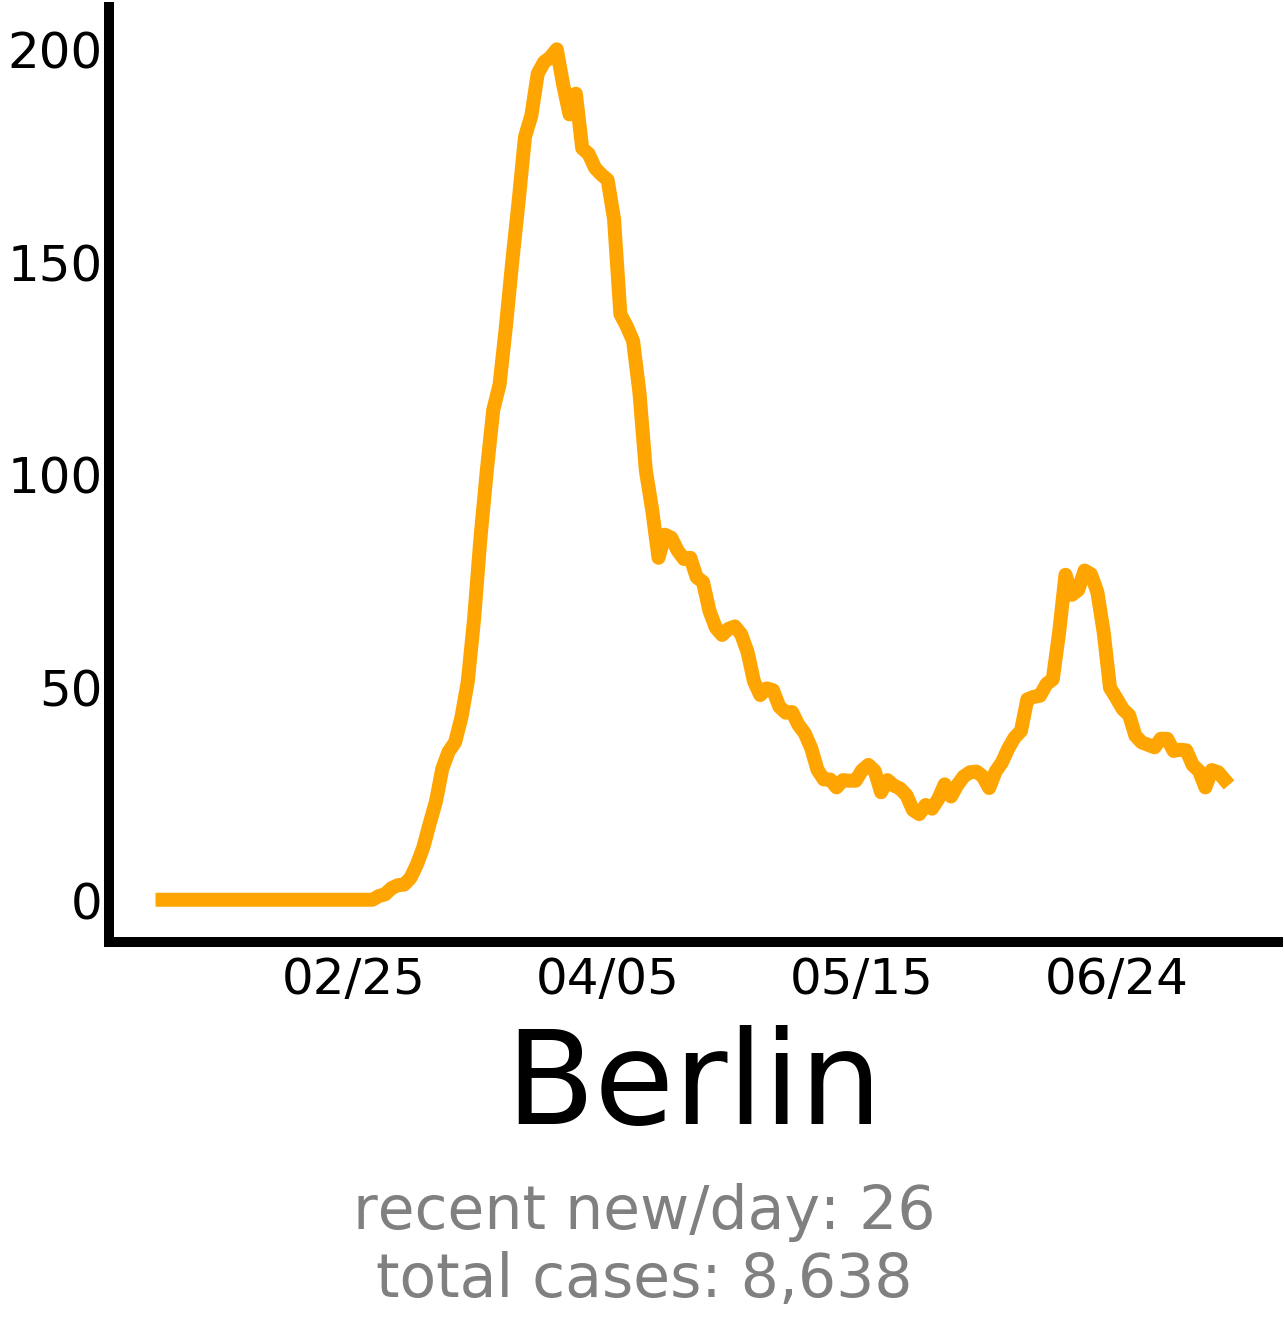

2020-01-26      0
2020-01-27      0
2020-01-28      0
2020-01-29      0
2020-01-30      0
2020-01-31      0
2020-02-01      0
2020-02-02      0
2020-02-03      0
2020-02-04      0
2020-02-05      0
2020-02-06      0
2020-02-07      0
2020-02-08      0
2020-02-09      0
2020-02-10      0
2020-02-11      0
2020-02-12      0
2020-02-13      0
2020-02-14      0
2020-02-15      0
2020-02-16      0
2020-02-17      0
2020-02-18      0
2020-02-19      0
2020-02-20      0
2020-02-21      0
2020-02-22      0
2020-02-23      0
2020-02-24      0
2020-02-25      0
2020-02-26      0
2020-02-27      0
2020-02-28      0
2020-02-29      0
2020-03-01      1
2020-03-02      0
2020-03-03      0
2020-03-04      0
2020-03-05      2
2020-03-06      0
2020-03-07      0
2020-03-08      4
2020-03-09      4
2020-03-10      9
2020-03-11      8
2020-03-12     25
2020-03-13     21
2020-03-14     14
2020-03-15     21
2020-03-16     20
2020-03-17     65
2020-03-18     46
2020-03-19     55
2020-03-20     63
2020-03-21

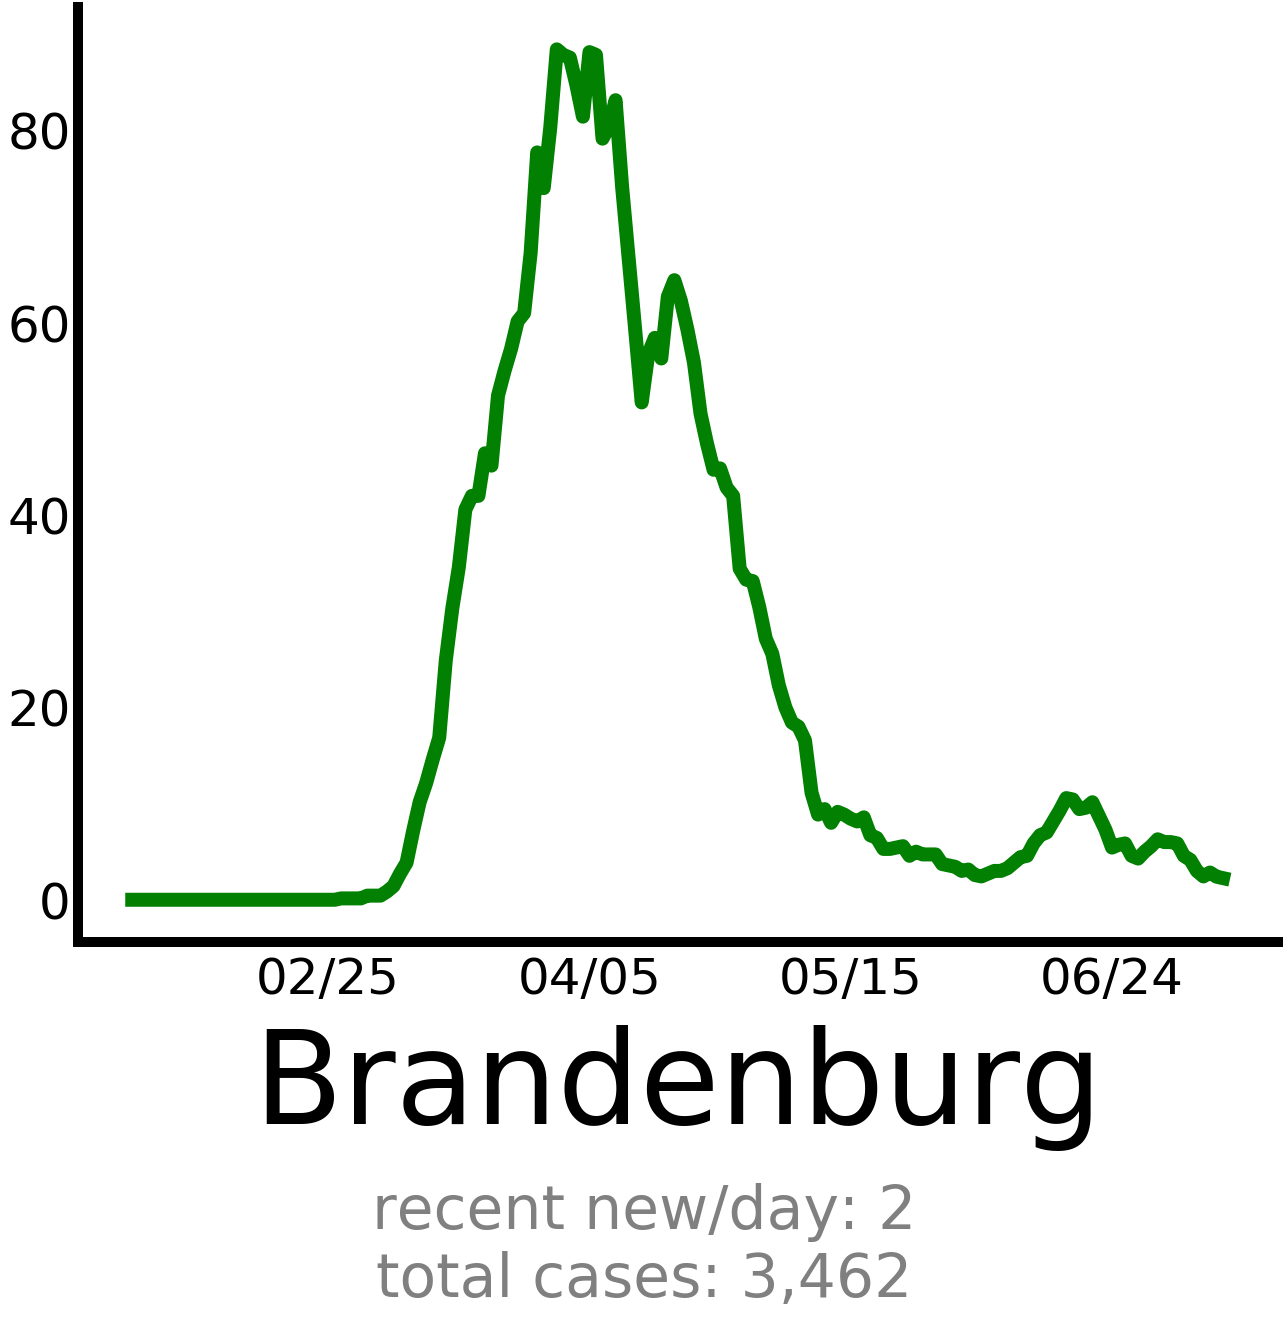

2020-01-26      0
2020-01-27      0
2020-01-28      0
2020-01-29      0
2020-01-30      0
2020-01-31      0
2020-02-01      0
2020-02-02      0
2020-02-03      0
2020-02-04      0
2020-02-05      0
2020-02-06      0
2020-02-07      0
2020-02-08      0
2020-02-09      0
2020-02-10      0
2020-02-11      0
2020-02-12      0
2020-02-13      0
2020-02-14      0
2020-02-15      0
2020-02-16      0
2020-02-17      0
2020-02-18      0
2020-02-19      0
2020-02-20      0
2020-02-21      0
2020-02-22      0
2020-02-23      0
2020-02-24      0
2020-02-25      0
2020-02-26      0
2020-02-27      0
2020-02-28      0
2020-02-29      0
2020-03-01      1
2020-03-02      1
2020-03-03      2
2020-03-04      0
2020-03-05      0
2020-03-06      0
2020-03-07      0
2020-03-08      0
2020-03-09      7
2020-03-10     11
2020-03-11     11
2020-03-12      7
2020-03-13      9
2020-03-14      3
2020-03-15      3
2020-03-16      1
2020-03-17     12
2020-03-18     10
2020-03-19     40
2020-03-20     24
2020-03-21

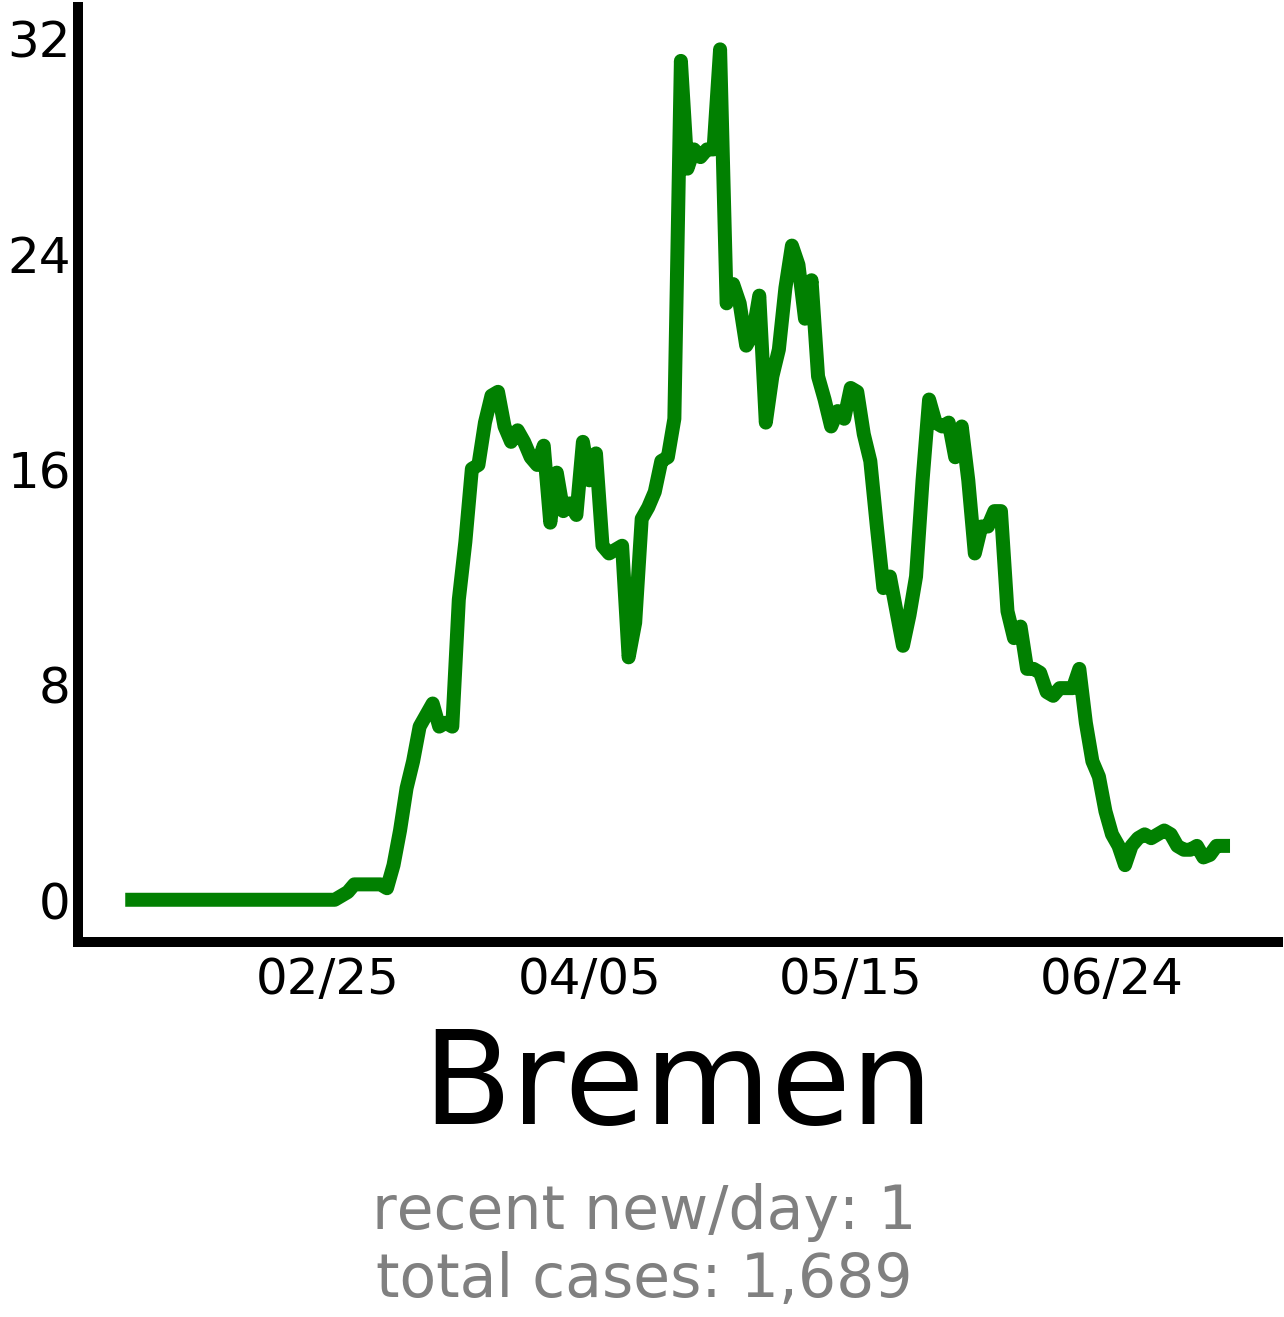

2020-01-26      0
2020-01-27      0
2020-01-28      0
2020-01-29      0
2020-01-30      0
2020-01-31      0
2020-02-01      0
2020-02-02      0
2020-02-03      0
2020-02-04      0
2020-02-05      0
2020-02-06      0
2020-02-07      0
2020-02-08      0
2020-02-09      0
2020-02-10      0
2020-02-11      0
2020-02-12      0
2020-02-13      0
2020-02-14      0
2020-02-15      0
2020-02-16      0
2020-02-17      0
2020-02-18      0
2020-02-19      0
2020-02-20      0
2020-02-21      0
2020-02-22      0
2020-02-23      0
2020-02-24      0
2020-02-25      0
2020-02-26      0
2020-02-27      0
2020-02-28      1
2020-02-29      1
2020-03-01      1
2020-03-02      0
2020-03-03      3
2020-03-04      3
2020-03-05      5
2020-03-06      3
2020-03-07      4
2020-03-08      5
2020-03-09     21
2020-03-10     30
2020-03-11     29
2020-03-12     42
2020-03-13     38
2020-03-14     78
2020-03-15     79
2020-03-16     80
2020-03-17    133
2020-03-18    134
2020-03-19    185
2020-03-20    145
2020-03-21

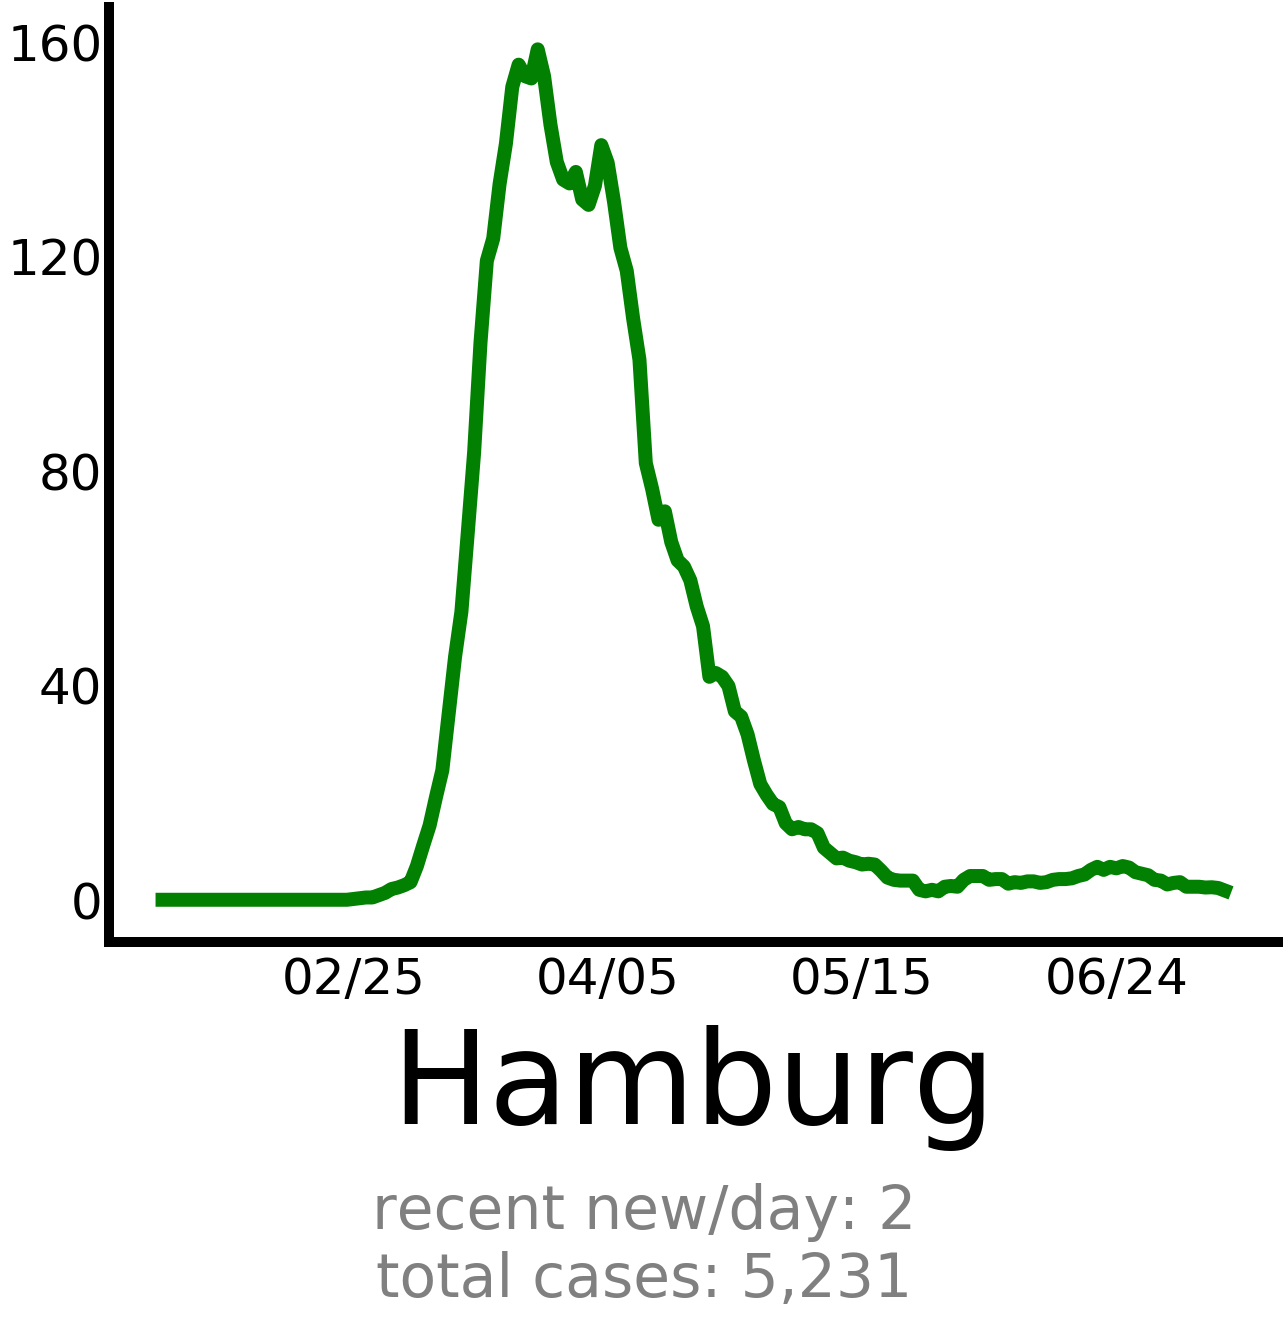

2020-01-26      0
2020-01-27      0
2020-01-28      0
2020-01-29      0
2020-01-30      0
2020-01-31      0
2020-02-01      0
2020-02-02      0
2020-02-03      0
2020-02-04      0
2020-02-05      0
2020-02-06      0
2020-02-07      0
2020-02-08      0
2020-02-09      0
2020-02-10      0
2020-02-11      0
2020-02-12      0
2020-02-13      0
2020-02-14      0
2020-02-15      0
2020-02-16      0
2020-02-17      0
2020-02-18      0
2020-02-19      0
2020-02-20      0
2020-02-21      0
2020-02-22      0
2020-02-23      0
2020-02-24      0
2020-02-25      0
2020-02-26      0
2020-02-27      0
2020-02-28      1
2020-02-29      0
2020-03-01      4
2020-03-02      4
2020-03-03      4
2020-03-04      2
2020-03-05      6
2020-03-06      1
2020-03-07      4
2020-03-08      0
2020-03-09     20
2020-03-10     16
2020-03-11     37
2020-03-12     37
2020-03-13     78
2020-03-14     82
2020-03-15     24
2020-03-16    126
2020-03-17    168
2020-03-18    224
2020-03-19    203
2020-03-20    212
2020-03-21

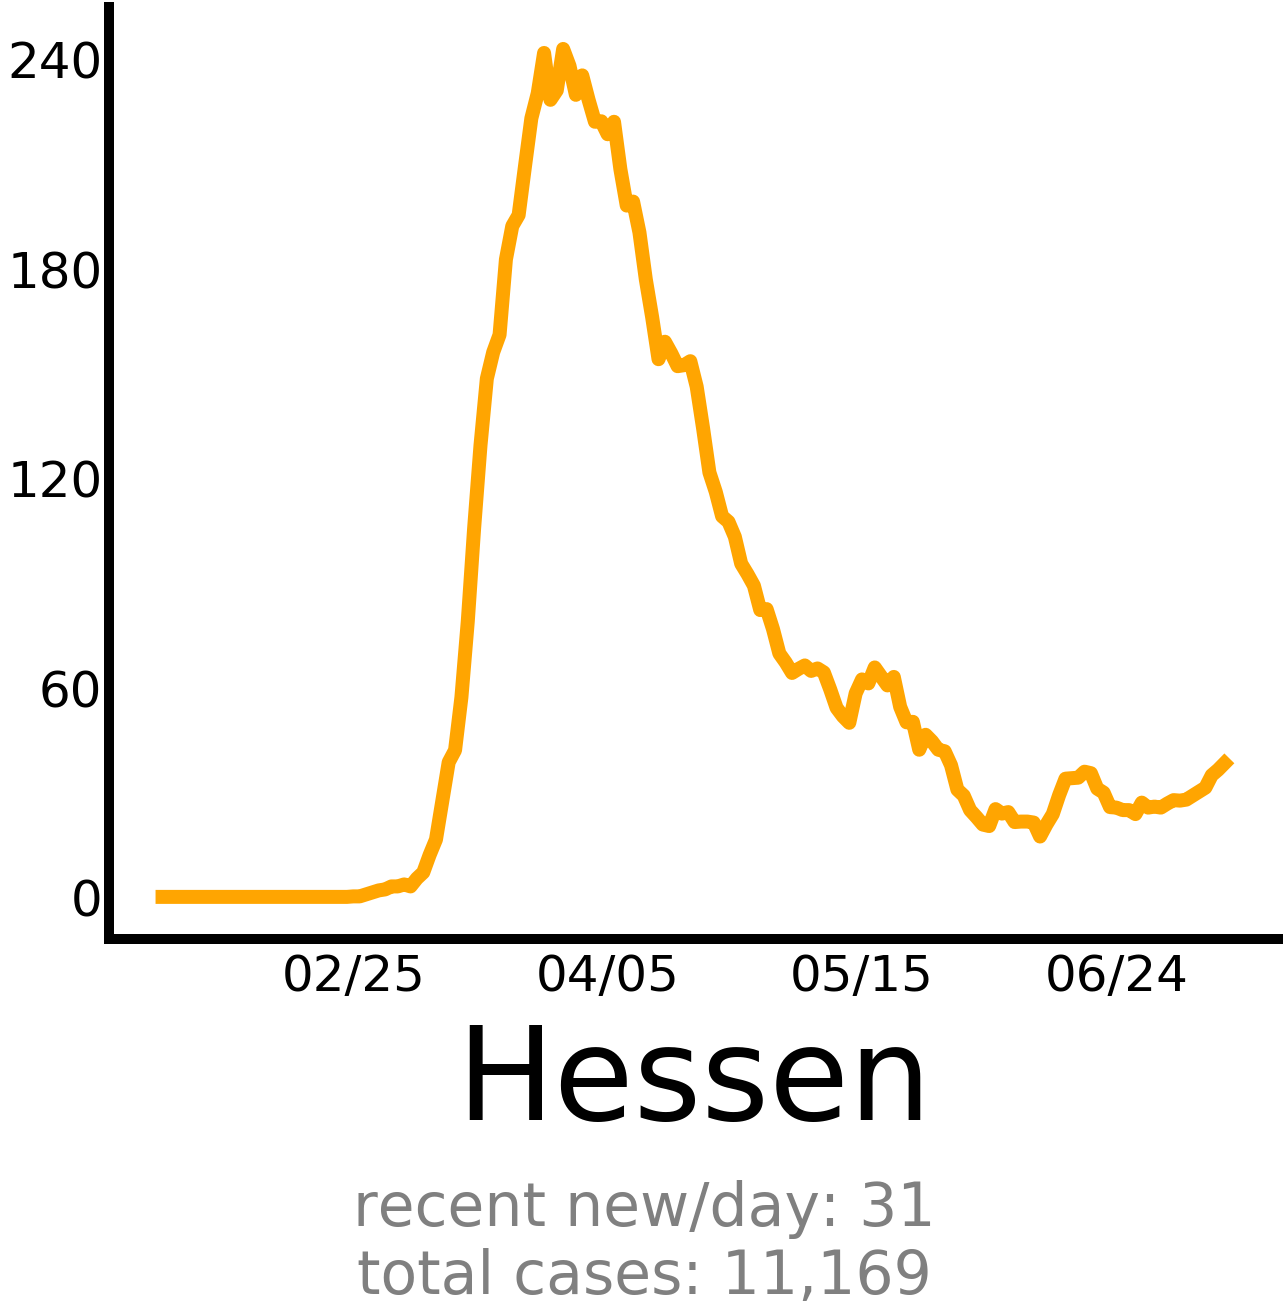

2020-01-26     0
2020-01-27     0
2020-01-28     0
2020-01-29     0
2020-01-30     0
2020-01-31     0
2020-02-01     0
2020-02-02     0
2020-02-03     0
2020-02-04     0
2020-02-05     0
2020-02-06     0
2020-02-07     0
2020-02-08     0
2020-02-09     0
2020-02-10     0
2020-02-11     0
2020-02-12     0
2020-02-13     0
2020-02-14     0
2020-02-15     0
2020-02-16     0
2020-02-17     0
2020-02-18     0
2020-02-19     0
2020-02-20     0
2020-02-21     0
2020-02-22     0
2020-02-23     0
2020-02-24     0
2020-02-25     0
2020-02-26     0
2020-02-27     0
2020-02-28     0
2020-02-29     0
2020-03-01     0
2020-03-02     0
2020-03-03     2
2020-03-04     2
2020-03-05     1
2020-03-06     0
2020-03-07     0
2020-03-08     2
2020-03-09     4
2020-03-10     1
2020-03-11     8
2020-03-12     9
2020-03-13     9
2020-03-14     1
2020-03-15     1
2020-03-16    14
2020-03-17    31
2020-03-18    43
2020-03-19    34
2020-03-20    16
2020-03-21    11
2020-03-22     1
2020-03-23    13
2020-03-24    

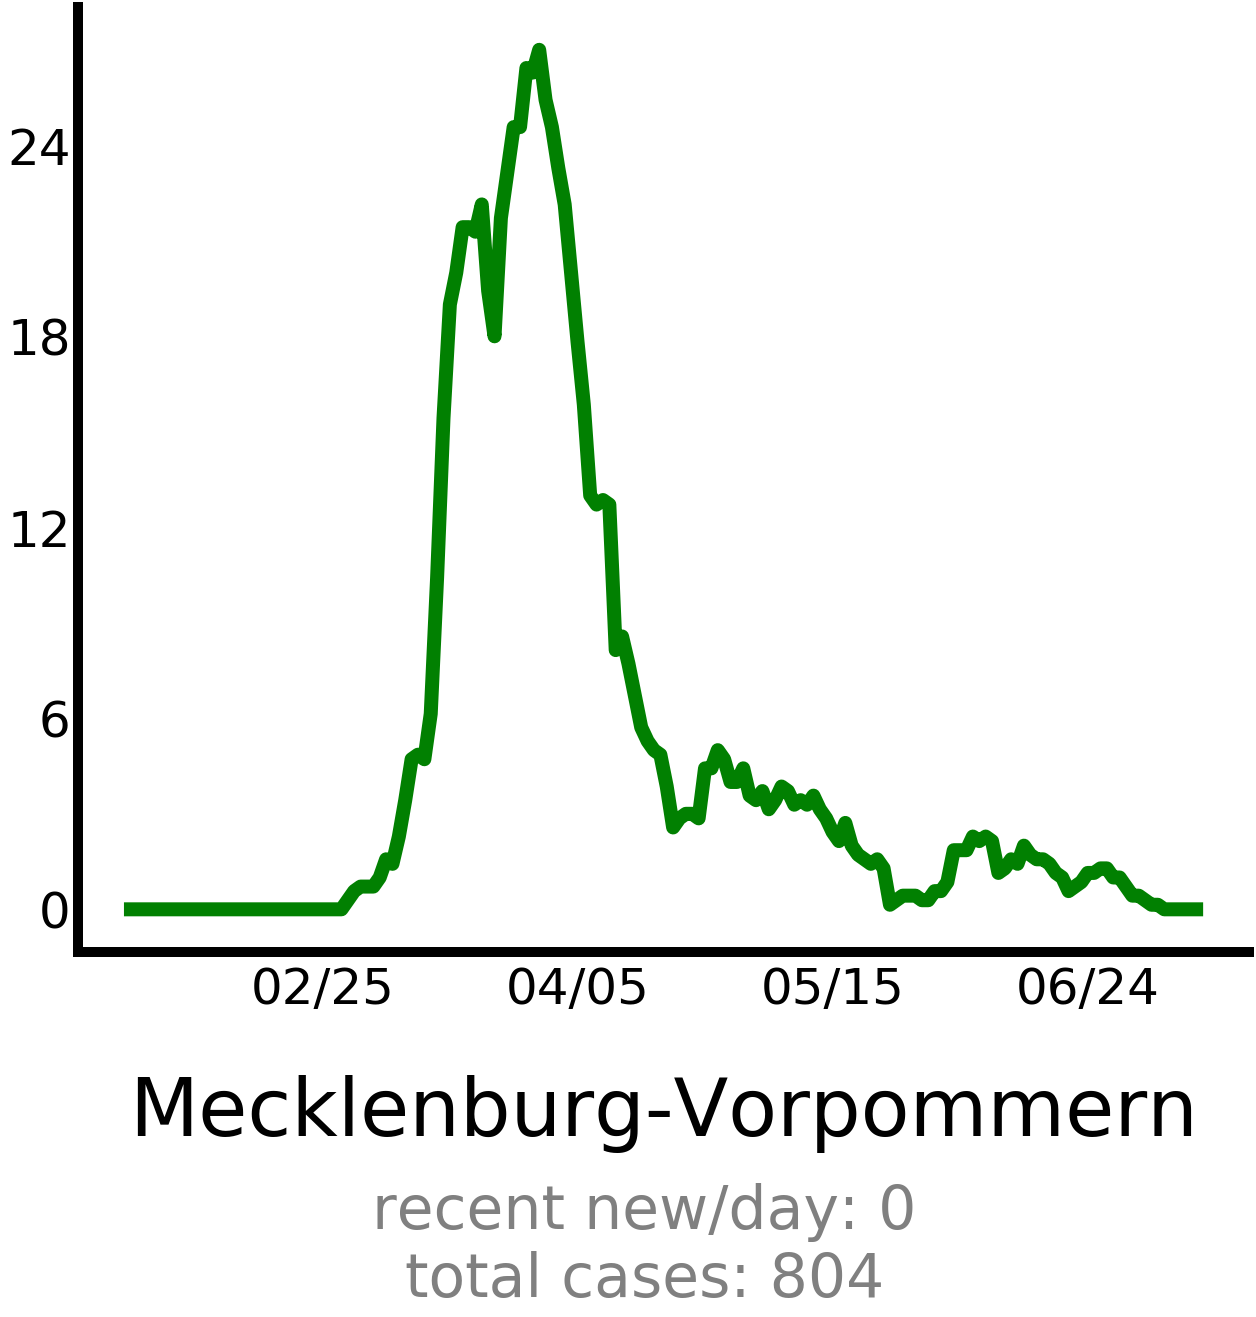

2020-01-26      0
2020-01-27      0
2020-01-28      0
2020-01-29      0
2020-01-30      0
2020-01-31      0
2020-02-01      0
2020-02-02      0
2020-02-03      0
2020-02-04      1
2020-02-05      0
2020-02-06      0
2020-02-07      0
2020-02-08      0
2020-02-09      0
2020-02-10      0
2020-02-11      0
2020-02-12      0
2020-02-13      0
2020-02-14      0
2020-02-15      0
2020-02-16      0
2020-02-17      0
2020-02-18      0
2020-02-19      0
2020-02-20      0
2020-02-21      0
2020-02-22      0
2020-02-23      0
2020-02-24      0
2020-02-25      0
2020-02-26      0
2020-02-27      0
2020-02-28      0
2020-02-29      0
2020-03-01      1
2020-03-02      2
2020-03-03      6
2020-03-04      4
2020-03-05      6
2020-03-06      7
2020-03-07      8
2020-03-08      4
2020-03-09     14
2020-03-10     35
2020-03-11     63
2020-03-12     69
2020-03-13     89
2020-03-14     77
2020-03-15     68
2020-03-16    156
2020-03-17    176
2020-03-18    277
2020-03-19    271
2020-03-20    267
2020-03-21

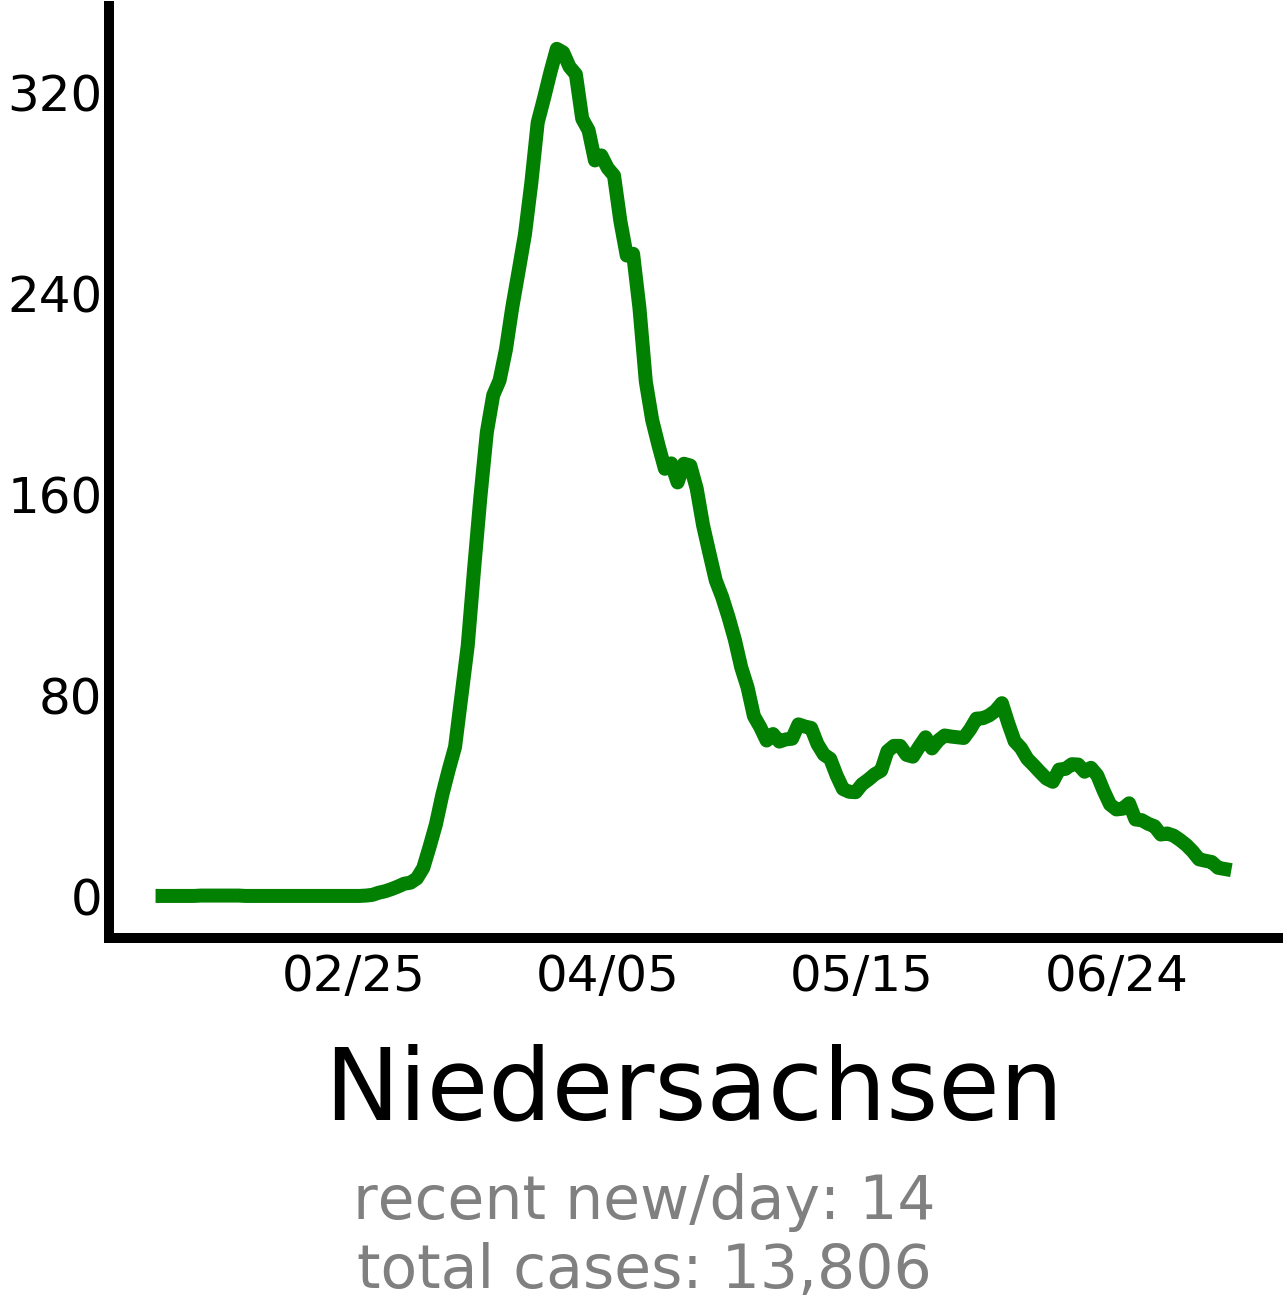

2020-01-26       0
2020-01-27       0
2020-01-28       0
2020-01-29       0
2020-01-30       0
2020-01-31       0
2020-02-01       0
2020-02-02       0
2020-02-03       0
2020-02-04       0
2020-02-05       0
2020-02-06       0
2020-02-07       0
2020-02-08       0
2020-02-09       0
2020-02-10       0
2020-02-11       0
2020-02-12       1
2020-02-13       0
2020-02-14       0
2020-02-15       0
2020-02-16       0
2020-02-17       0
2020-02-18       0
2020-02-19       0
2020-02-20       1
2020-02-21       0
2020-02-22       1
2020-02-23       0
2020-02-24       0
2020-02-25       0
2020-02-26       3
2020-02-27      19
2020-02-28      35
2020-02-29      15
2020-03-01      23
2020-03-02      15
2020-03-03      30
2020-03-04      90
2020-03-05      97
2020-03-06      62
2020-03-07      67
2020-03-08      26
2020-03-09      97
2020-03-10     173
2020-03-11     200
2020-03-12     281
2020-03-13     418
2020-03-14     322
2020-03-15     241
2020-03-16     610
2020-03-17     910
2020-03-18  

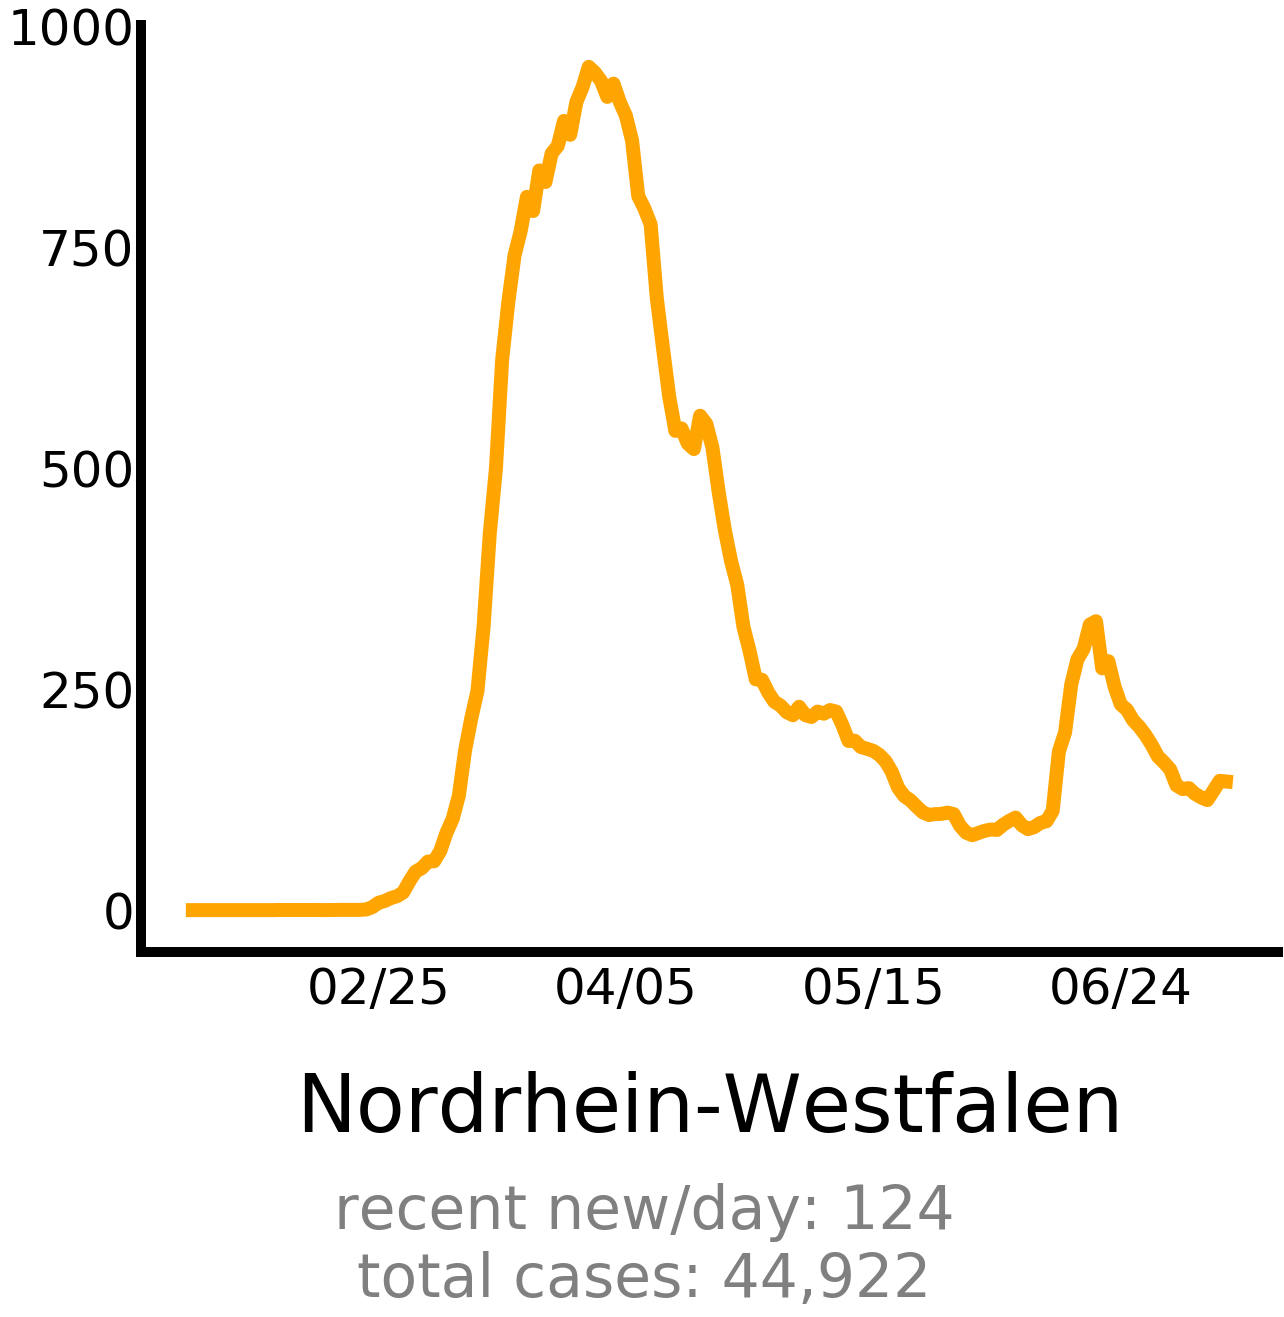

2020-01-26      0
2020-01-27      0
2020-01-28      0
2020-01-29      0
2020-01-30      0
2020-01-31      0
2020-02-01      0
2020-02-02      0
2020-02-03      0
2020-02-04      0
2020-02-05      0
2020-02-06      0
2020-02-07      0
2020-02-08      0
2020-02-09      0
2020-02-10      0
2020-02-11      0
2020-02-12      0
2020-02-13      0
2020-02-14      0
2020-02-15      0
2020-02-16      0
2020-02-17      0
2020-02-18      0
2020-02-19      0
2020-02-20      0
2020-02-21      0
2020-02-22      0
2020-02-23      0
2020-02-24      0
2020-02-25      0
2020-02-26      0
2020-02-27      0
2020-02-28      1
2020-02-29      1
2020-03-01      0
2020-03-02      0
2020-03-03      1
2020-03-04      4
2020-03-05      1
2020-03-06      2
2020-03-07      2
2020-03-08      3
2020-03-09      6
2020-03-10     17
2020-03-11     29
2020-03-12     64
2020-03-13     58
2020-03-14     51
2020-03-15     95
2020-03-16    125
2020-03-17    168
2020-03-18    158
2020-03-19    135
2020-03-20    181
2020-03-21

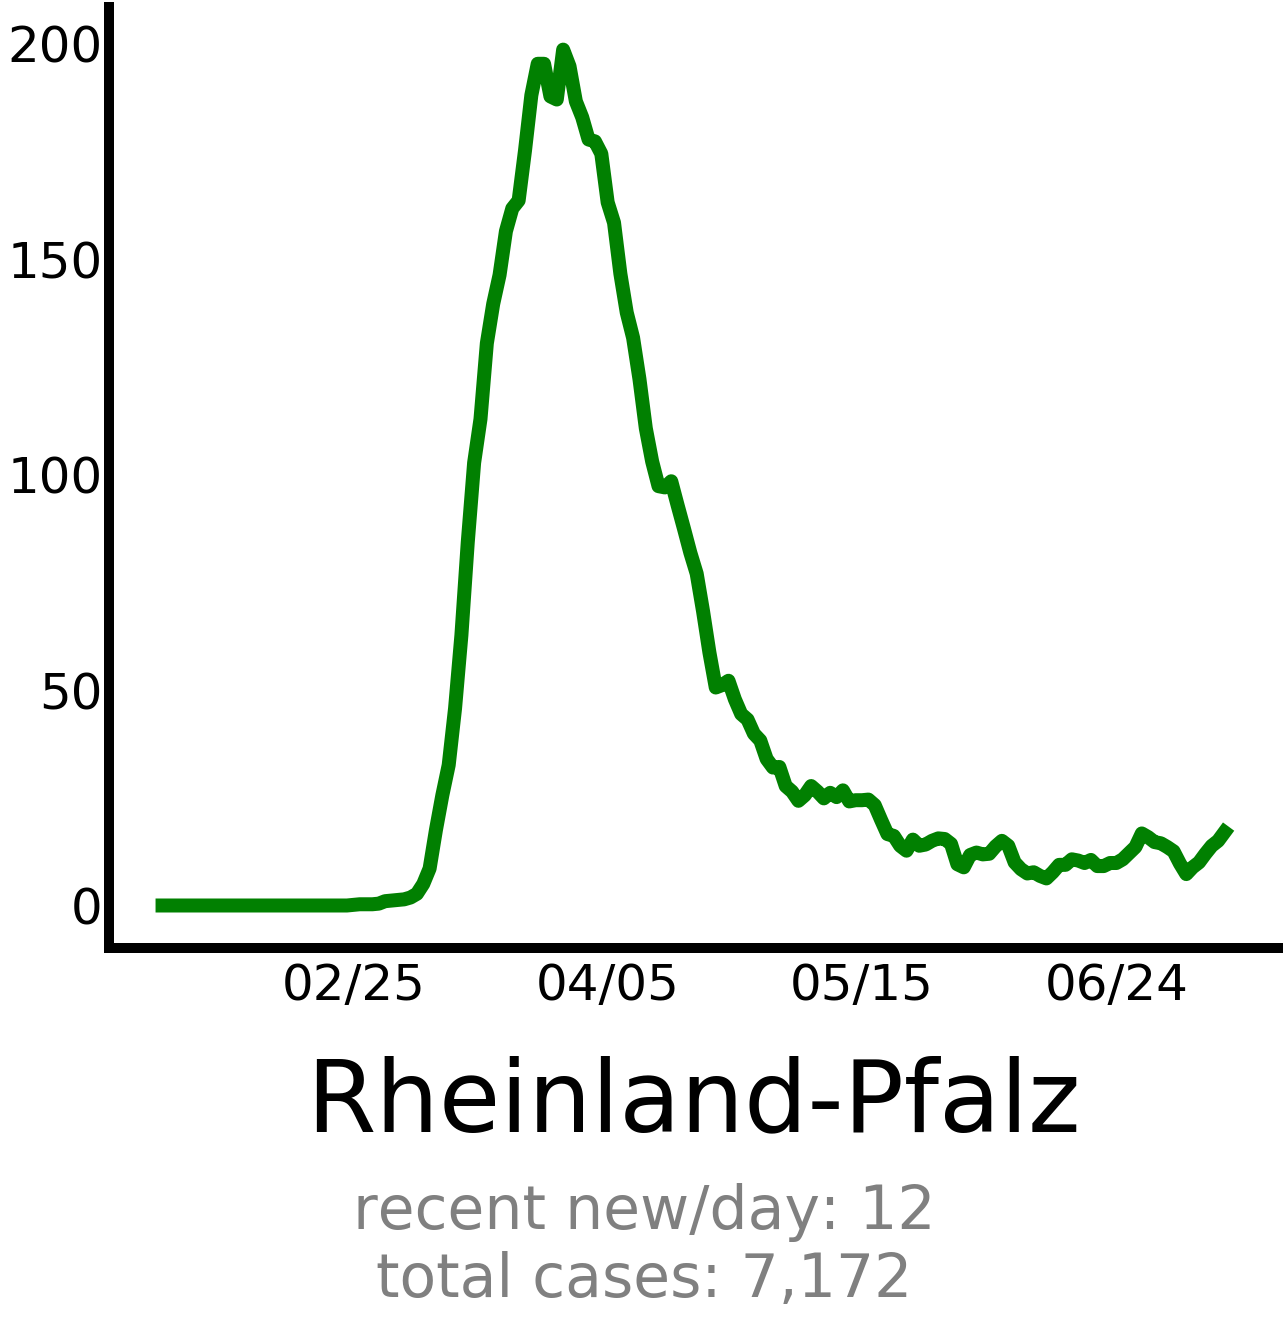

2020-01-26      0
2020-01-27      0
2020-01-28      0
2020-01-29      0
2020-01-30      0
2020-01-31      0
2020-02-01      0
2020-02-02      0
2020-02-03      0
2020-02-04      0
2020-02-05      0
2020-02-06      0
2020-02-07      0
2020-02-08      0
2020-02-09      0
2020-02-10      0
2020-02-11      0
2020-02-12      0
2020-02-13      0
2020-02-14      0
2020-02-15      0
2020-02-16      0
2020-02-17      0
2020-02-18      0
2020-02-19      0
2020-02-20      0
2020-02-21      0
2020-02-22      0
2020-02-23      0
2020-02-24      0
2020-02-25      0
2020-02-26      0
2020-02-27      0
2020-02-28      0
2020-02-29      0
2020-03-01      0
2020-03-02      0
2020-03-03      0
2020-03-04      0
2020-03-05      0
2020-03-06      0
2020-03-07      0
2020-03-08      1
2020-03-09      5
2020-03-10      2
2020-03-11     10
2020-03-12     13
2020-03-13     17
2020-03-14     12
2020-03-15     18
2020-03-16     24
2020-03-17     24
2020-03-18     44
2020-03-19     45
2020-03-20     37
2020-03-21

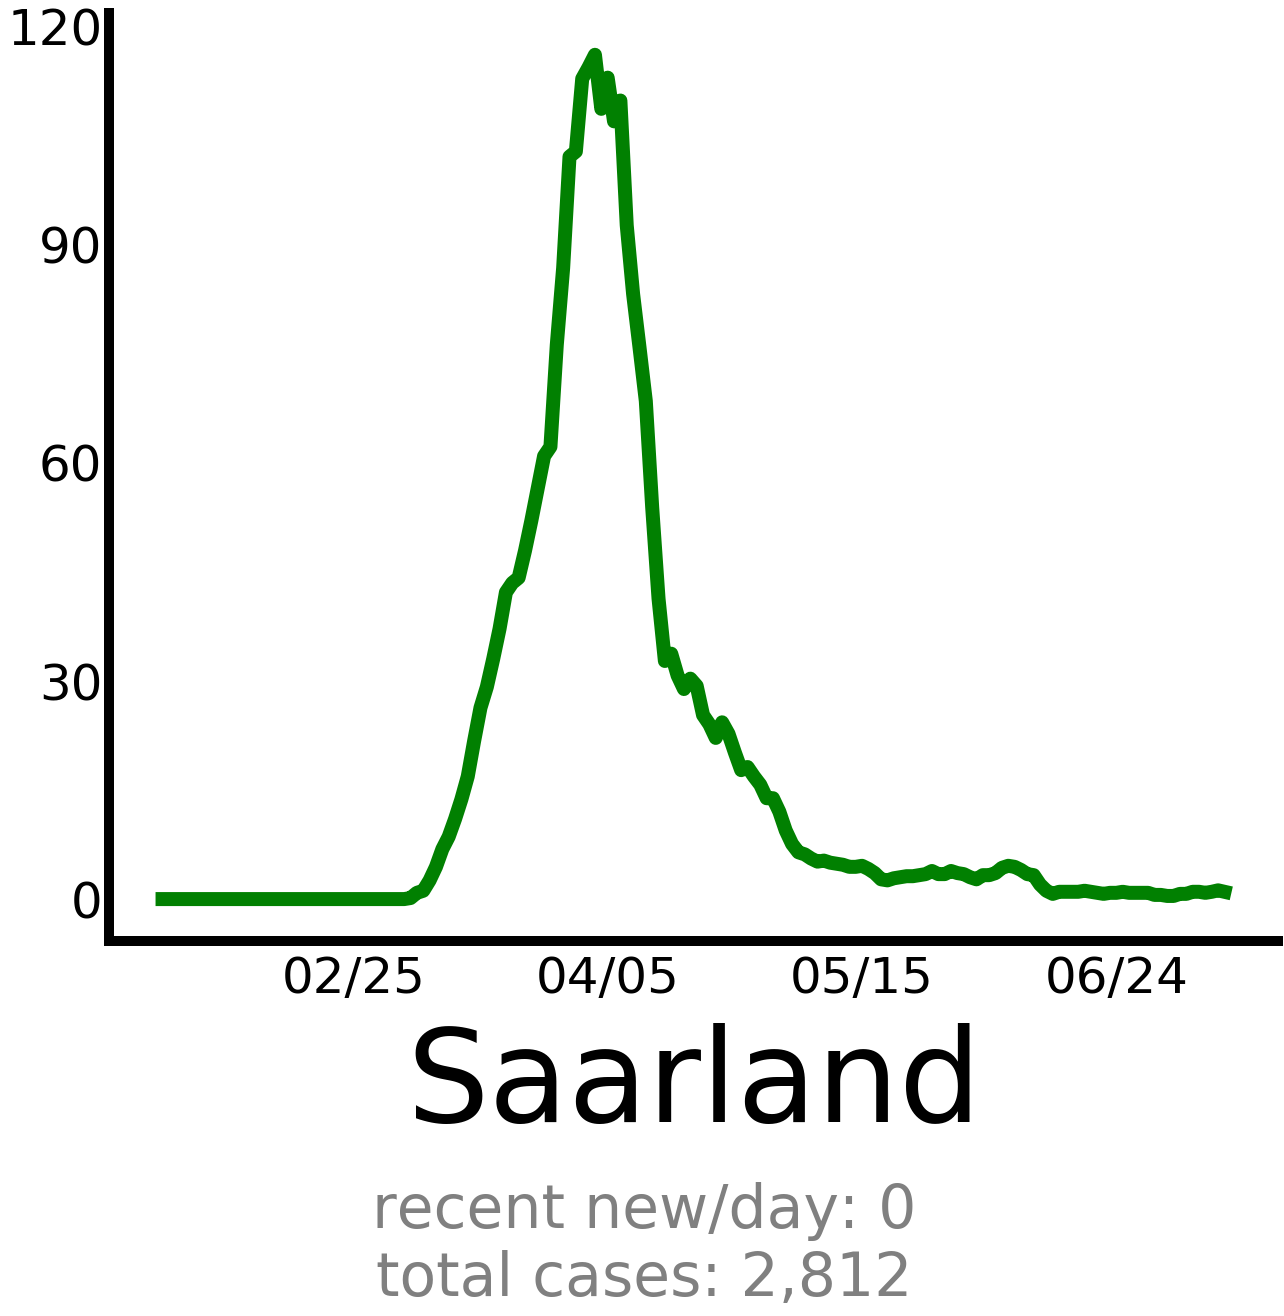

2020-01-26      0
2020-01-27      0
2020-01-28      0
2020-01-29      0
2020-01-30      0
2020-01-31      0
2020-02-01      0
2020-02-02      0
2020-02-03      0
2020-02-04      0
2020-02-05      0
2020-02-06      0
2020-02-07      0
2020-02-08      0
2020-02-09      0
2020-02-10      0
2020-02-11      0
2020-02-12      0
2020-02-13      0
2020-02-14      0
2020-02-15      0
2020-02-16      0
2020-02-17      0
2020-02-18      0
2020-02-19      0
2020-02-20      0
2020-02-21      0
2020-02-22      0
2020-02-23      0
2020-02-24      0
2020-02-25      0
2020-02-26      0
2020-02-27      0
2020-02-28      0
2020-02-29      0
2020-03-01      0
2020-03-02      1
2020-03-03      0
2020-03-04      0
2020-03-05      0
2020-03-06      2
2020-03-07      2
2020-03-08      5
2020-03-09      5
2020-03-10     21
2020-03-11     16
2020-03-12     28
2020-03-13     36
2020-03-14     34
2020-03-15     30
2020-03-16     43
2020-03-17     86
2020-03-18    131
2020-03-19    155
2020-03-20    143
2020-03-21

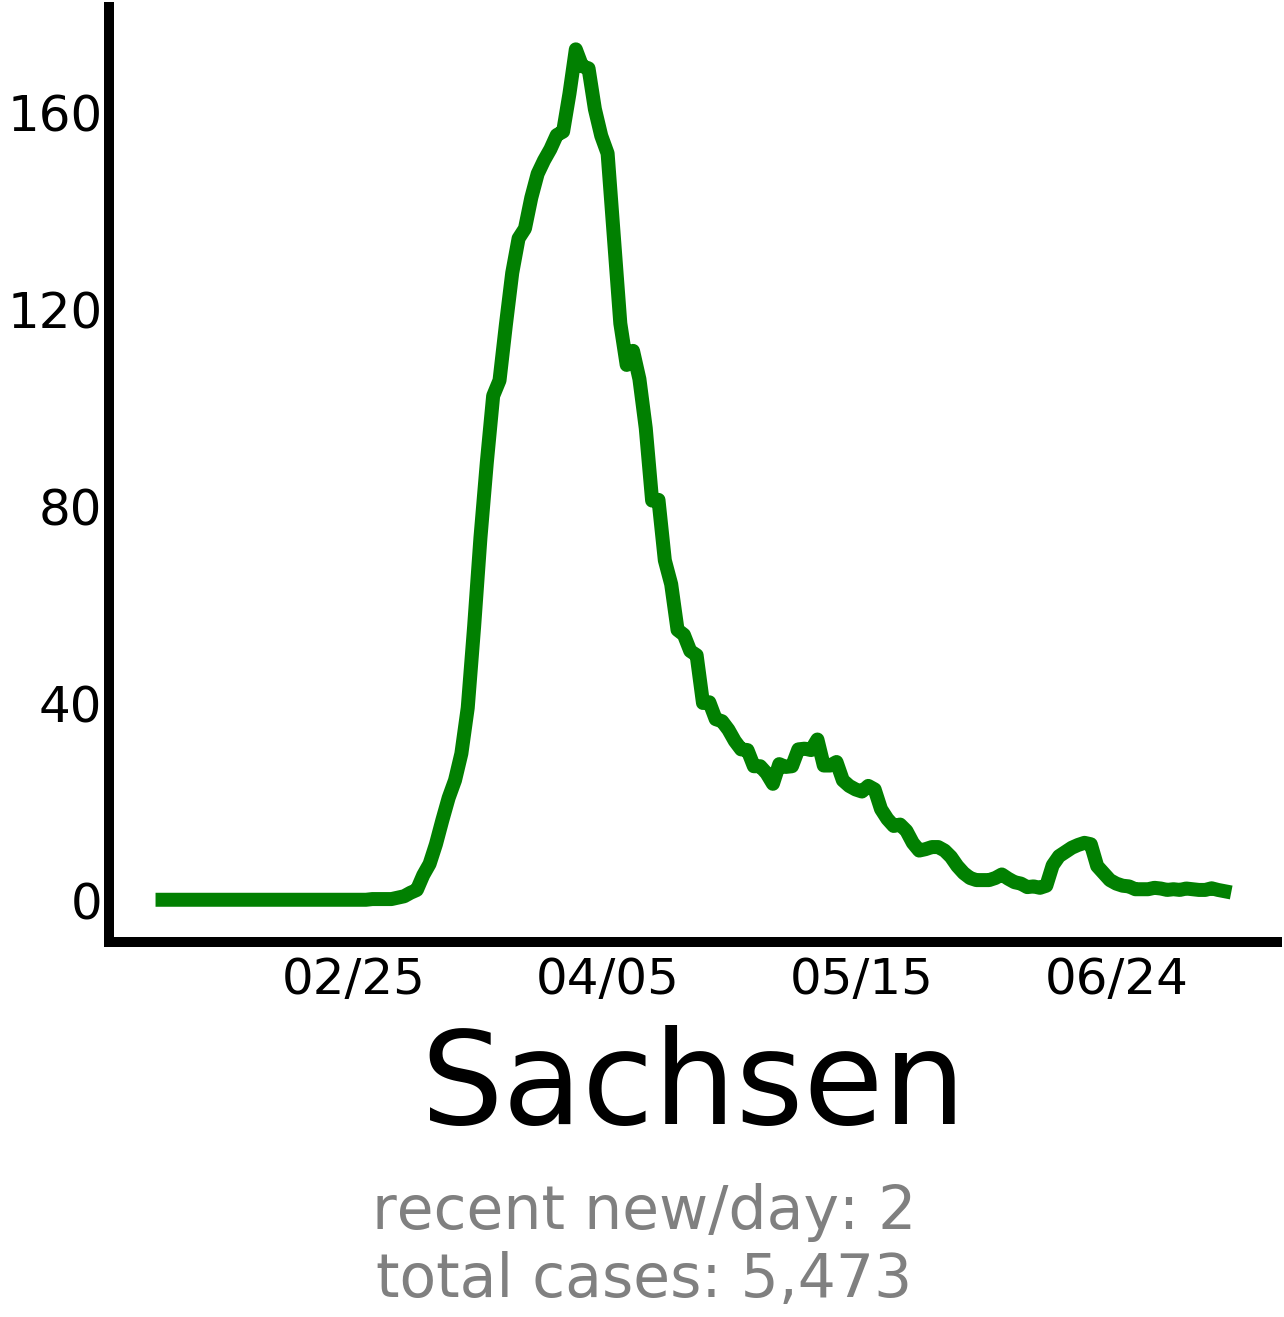

2020-01-26     0
2020-01-27     0
2020-01-28     0
2020-01-29     0
2020-01-30     0
2020-01-31     0
2020-02-01     0
2020-02-02     0
2020-02-03     0
2020-02-04     0
2020-02-05     0
2020-02-06     0
2020-02-07     0
2020-02-08     0
2020-02-09     0
2020-02-10     0
2020-02-11     0
2020-02-12     0
2020-02-13     0
2020-02-14     0
2020-02-15     0
2020-02-16     0
2020-02-17     0
2020-02-18     0
2020-02-19     0
2020-02-20     0
2020-02-21     0
2020-02-22     0
2020-02-23     0
2020-02-24     0
2020-02-25     0
2020-02-26     0
2020-02-27     0
2020-02-28     0
2020-02-29     0
2020-03-01     0
2020-03-02     0
2020-03-03     0
2020-03-04     0
2020-03-05     0
2020-03-06     0
2020-03-07     0
2020-03-08     0
2020-03-09     0
2020-03-10     6
2020-03-11    15
2020-03-12    14
2020-03-13    11
2020-03-14     2
2020-03-15     0
2020-03-16    35
2020-03-17    29
2020-03-18    38
2020-03-19    43
2020-03-20    51
2020-03-21    18
2020-03-22    14
2020-03-23    66
2020-03-24    

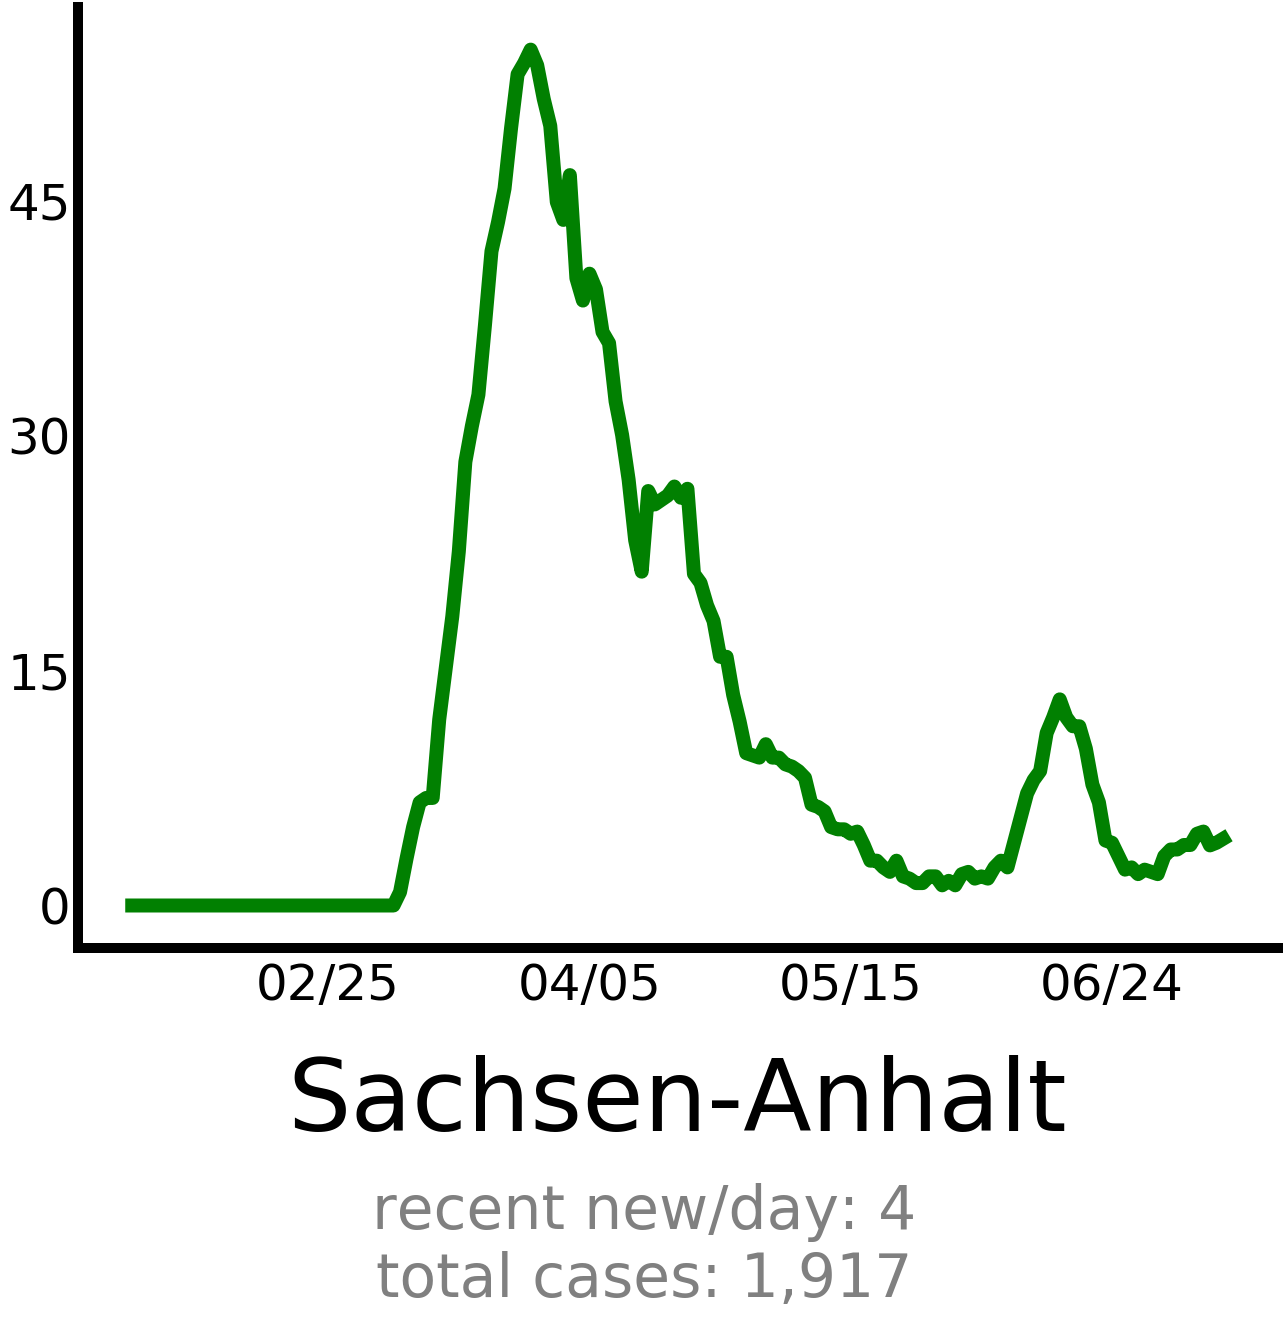

2020-01-26      0
2020-01-27      0
2020-01-28      0
2020-01-29      0
2020-01-30      0
2020-01-31      0
2020-02-01      0
2020-02-02      0
2020-02-03      0
2020-02-04      0
2020-02-05      0
2020-02-06      0
2020-02-07      0
2020-02-08      0
2020-02-09      0
2020-02-10      0
2020-02-11      0
2020-02-12      0
2020-02-13      0
2020-02-14      0
2020-02-15      0
2020-02-16      0
2020-02-17      0
2020-02-18      0
2020-02-19      0
2020-02-20      0
2020-02-21      0
2020-02-22      0
2020-02-23      0
2020-02-24      0
2020-02-25      0
2020-02-26      0
2020-02-27      0
2020-02-28      1
2020-02-29      1
2020-03-01      0
2020-03-02      2
2020-03-03      1
2020-03-04      0
2020-03-05      1
2020-03-06      2
2020-03-07      0
2020-03-08      1
2020-03-09      3
2020-03-10      7
2020-03-11     19
2020-03-12     18
2020-03-13     27
2020-03-14     24
2020-03-15     21
2020-03-16     29
2020-03-17     46
2020-03-18     53
2020-03-19     60
2020-03-20     78
2020-03-21

KeyboardInterrupt: 

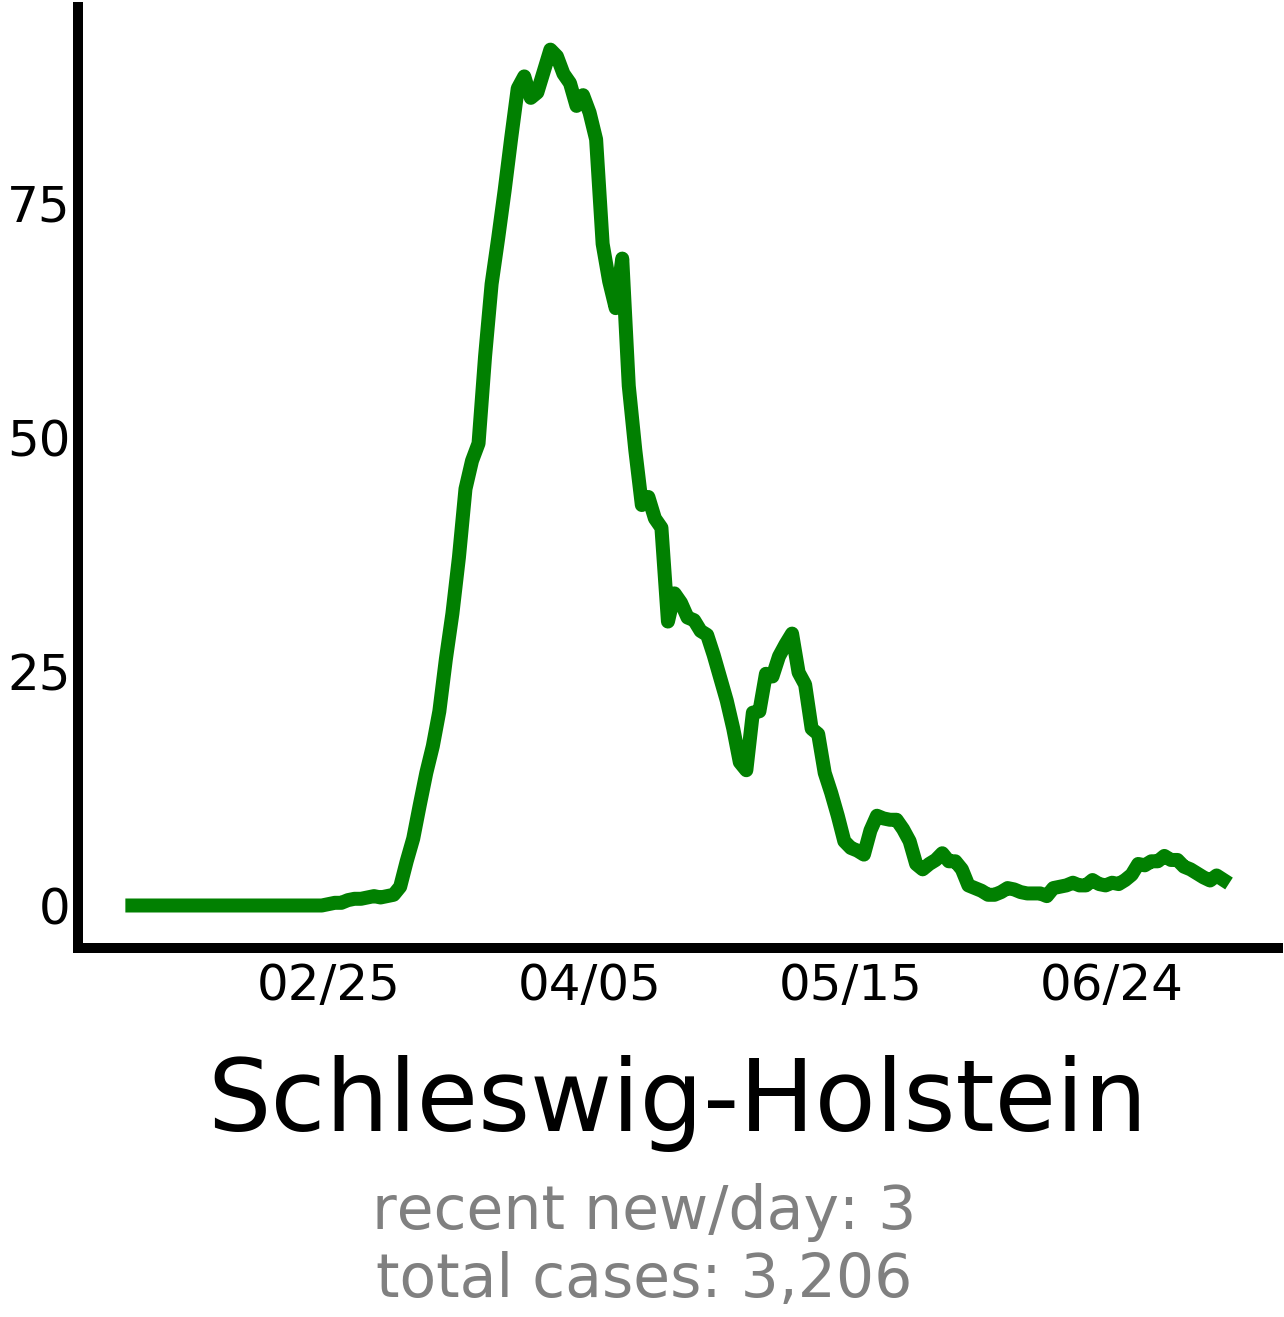

In [5]:
import datetime as dt
winning = 0
nearly_there = 0 
needs_action = 0

for country in confirm.columns:
    bula = focus[focus['Bundesland']==country]
    bula = bula.sort_values(['Meldedatum'], ascending=[True])

    bula['Total'] = bula.groupby(['Landkreis', 'Meldedatum'])['AnzahlFall'].transform('sum')
    new_bula = bula.drop_duplicates(subset=['Landkreis', 'Meldedatum'])
    bula['Total_Bula'] = bula.groupby(['Meldedatum'])['AnzahlFall'].transform('sum')

    bula2 = bula.copy().drop(['Landkreis', 'Bundesland','AnzahlFall','Total'], axis=1)
    bula2 = bula2.drop_duplicates(subset=['Meldedatum'])

    bula2.set_index('Meldedatum', inplace=True)
    bula2.index = pd.to_datetime(bula2.index)
    idx = pd.date_range('01/26/2020', dt.datetime.today().strftime("%m/%d/%Y"))
    bula2 = bula2.reindex(idx, fill_value=0)
    bula2.drop(bula2.tail(2).index,inplace=True)

    #Italy continued

    d = 7 #the number of recent days to average over for new cases/day 
    ho = bula2['Total_Bula']


    window = 7
    ha = ho.rolling(window=window, min_periods=1, center=True).mean()

    total=int(ho.sum()) #compute total cases
    avg=int(ho[len(ho)-d:].sum()/d) #compute average new cases for the last d days
    n_0 = 20
    f_0 = 0.5
    f_1 = 0.2
    peak = ha.max()

    if avg <= n_0*f_0 or avg <= n_0 and avg <= f_0*peak:
        color = 'green'
        winning += 1
    elif avg <= 1.5*n_0 and avg <= f_0*peak or avg <= peak*f_1:
        color = 'orange'
        nearly_there += 1
    else:
        color = 'red'
        needs_action += 1


    fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(18,16))
    ax.plot(ha.index, ha, lw=14, alpha=2, c=color)
    #label='Daily new COVID-19 cases\n10-day average',
    # for i, v in enumerate(focus.new):
    #     if v > 0 and v not in [5974,4050,5210,4668,3590,6549,3148,19444,4056,32829,29595]:
    #         ax.text(focus.index[i], v+0.3, str(int(v)), color='orangered', fontsize=20)

    pd.options.display.max_rows = 4000
    print(ho)
    print(ha.max())
    print(ha)
    # ax.set_yscale('log')
    ax.tick_params(labelsize=50)
    #ax.legend(fontsize=30, frameon=False, loc = 'upper left')
    # plt.ylabel('Daily New Cases', fontsize=60)
    #ax.set_yticklabels([])

    for axis in ['bottom']:
      ax.spines[axis].set_linewidth(10)
    for axis in ['left']:
      ax.spines[axis].set_linewidth(10)
    for axis in ['right','top']:
      ax.spines[axis].set_linewidth(0)

    #country = 'South Korea'
    #country = 'U.A.E.'
    #country = 'Bosnia'



    if len(country) < 13:
        fs = 130
    elif len(country) < 19: 
        fs = 100
    else:
        fs = 80


    plt.title(country, y=-.2, fontsize=fs)

    #print(avg)
    #print(focus['new'][len(focus)-d:])

    plt.suptitle("recent new/day: {:,}\ntotal cases: {:,}".format(avg,total), y=-0.03, fontsize=60, color='grey')
    #plt.suptitle("total cases: {:,}".format(total), y=-0.03, fontsize=60, color='grey')

    plt.tight_layout()
    ax.tick_params(axis='x', pad=10)
    ax.xaxis.set_major_locator(plt.MaxNLocator(6))
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
    #plt.ylim(0)
    plt.savefig(r'figures\regions\germany/%s.png'% (country), dpi=300, bbox_inches='tight', pad_inches=1)
    plt.show()



In [72]:
country = 'LK Ahrweiler'
bula = focus[focus['Landkreis']==country]
bula = bula.sort_values(['Meldedatum'], ascending=[True])
bula['Total'] = bula.groupby(['Landkreis', 'Meldedatum'])['AnzahlFall'].transform('sum')
new_bula = bula.drop_duplicates(subset=['Landkreis', 'Meldedatum'])


bula2 = new_bula.copy().drop(['Landkreis','Bundesland','AnzahlFall'], axis=1)


bula2.set_index('Meldedatum', inplace=True)
bula2.index = pd.to_datetime(bula2.index)
idx = pd.date_range('01/26/2020', dt.datetime.today().strftime("%m/%d/%Y"))
bula2 = bula2.reindex(idx, fill_value=0)
bula2.drop(bula2.tail(2).index,inplace=True)
print(bula2)

            Total
2020-01-26      0
2020-01-27      0
2020-01-28      0
2020-01-29      0
2020-01-30      0
2020-01-31      0
2020-02-01      0
2020-02-02      0
2020-02-03      0
2020-02-04      0
2020-02-05      0
2020-02-06      0
2020-02-07      0
2020-02-08      0
2020-02-09      0
2020-02-10      0
2020-02-11      0
2020-02-12      0
2020-02-13      0
2020-02-14      0
2020-02-15      0
2020-02-16      0
2020-02-17      0
2020-02-18      0
2020-02-19      0
2020-02-20      0
2020-02-21      0
2020-02-22      0
2020-02-23      0
2020-02-24      0
2020-02-25      0
2020-02-26      0
2020-02-27      0
2020-02-28      0
2020-02-29      0
2020-03-01      0
2020-03-02      0
2020-03-03      0
2020-03-04      0
2020-03-05      0
2020-03-06      0
2020-03-07      0
2020-03-08      0
2020-03-09      0
2020-03-10      0
2020-03-11      0
2020-03-12      6
2020-03-13      3
2020-03-14      1
2020-03-15      0
2020-03-16      4
2020-03-17      6
2020-03-18      8
2020-03-19      7
2020-03-20

## Update country plots

This cell generates the dynamic plots for the top 10 countries, next cell is used to generate a single country of interest. Please create a folder named "figures" the first time used
* offset is the starting days since Jan.22, generally set to 35, can be fine tuned in the next cell. 
* window is the number of days for rolling average, generally set to 7

In [4]:
# Green zone ranking
cols=['green days','last 14 days','County']
import datetime as dt
collect = []
for country in confirm_LK.columns:
    bula = focus[focus['Landkreis']==country]
    bula = bula.sort_values(['Meldedatum'], ascending=[True])
    bula['Total'] = bula.groupby(['Landkreis', 'Meldedatum'])['AnzahlFall'].transform('sum')
    new_bula = bula.drop_duplicates(subset=['Landkreis', 'Meldedatum'])


    bula2 = new_bula.copy().drop(['Bundesland','AnzahlFall'], axis=1)


    bula2.set_index('Meldedatum', inplace=True)
    bula2.index = pd.to_datetime(bula2.index)
    idx = pd.date_range('01/26/2020', dt.datetime.today().strftime("%m/%d/%Y"))
    bula2 = bula2.reindex(idx, fill_value=0)
    bula2.drop(bula2.tail(2).index,inplace=True)

    ave = bula2['Total']
    las = len(ave)-14
    last_forteen = ave[las:].sum()
    if last_forteen < 0:
        last_forteen = 0
    i = len(ave)-1
    c = 0
    while i > 0:
        if ave[i] <= 0:
            c = c + 1
        else:
            i = 0
        i = i - 1

    collect.append((c,
                   last_forteen,
                   country))


thr = pd.DataFrame(collect, columns=cols)
fin = thr.sort_values(['green days'], ascending=[False])
fin['week'] = fin['green days'].gt(13) 
tab = fin.sort_values(['week'], ascending=[False])
tab_t = tab[tab['week']==True]
tab_f = tab[tab['week']==False]
tab_f = tab_f.sort_values(['last 14 days','green days'], ascending = [True,False])
tab_t = tab_t.sort_values(['green days','last 14 days'], ascending = [False,True])
tab = tab_t.append(tab_f)
tab = tab.drop(['week'], axis=1)
tab2 = pd.DataFrame()
tab2['District'] = tab['County']
tab2['COVID-free days'] = tab['green days']
tab2['Total cases in last 14 days'] = tab['last 14 days']
tab2.reset_index(drop=True, inplace=True)
tab2.index += 1
tab2.to_excel (r'C:\Users\vince\Desktop\/%s.xlsx'% ('germany-ranking'), index = True, header=True)
#Italy continued


               Landkreis  Total
2020-01-26             0      0
2020-01-27             0      0
2020-01-28             0      0
2020-01-29             0      0
2020-01-30             0      0
2020-01-31             0      0
2020-02-01             0      0
2020-02-02             0      0
2020-02-03             0      0
2020-02-04             0      0
2020-02-05             0      0
2020-02-06             0      0
2020-02-07             0      0
2020-02-08             0      0
2020-02-09             0      0
2020-02-10             0      0
2020-02-11             0      0
2020-02-12             0      0
2020-02-13             0      0
2020-02-14             0      0
2020-02-15             0      0
2020-02-16             0      0
2020-02-17             0      0
2020-02-18             0      0
2020-02-19             0      0
2020-02-20             0      0
2020-02-21             0      0
2020-02-22             0      0
2020-02-23             0      0
2020-02-24             0      0
2020-02-

In [7]:
def highlighter(s):
    val_1 = s['COVID-Free Days']
    val_2 = s['New Cases in Last 14 Days']
    r=''
    try:
        if val_1>=14:
            r = 'background-color: #018001;'
        elif 20>=val_2>=0 :
            r = 'background-color: #02be02;'
        elif 200>=val_2 >=21:
            r = 'background-color: #ffff01;'
        elif 1000>=val_2 >= 201:
            r = 'background-color: #ffa501;'
        elif 20000>=val_2 >= 1001:
            r = 'background-color: #ff3434;'
        elif val_2 > 20001:
            r = 'background-color: #990033;'
    except Exception as e:
        r = 'background-color: white'
    return [r]*len(s)

def hover(hover_color="#ffff99"):
    return dict(selector="tbody tr:hover td, tbody tr:hover th",
                props=[("background-color", "rgba(66, 165, 245, 0.2) !important")])

In [ ]:
styles=[hover(),]
for region in Regions:
    print(region)
    Regions[region] = Regions[region].astype({"COVID-Free Days": int, "New Cases in Last 14 Days": int})
    temp = Regions[region].sort_values(by=['New Cases in Last 14 Days', 'COVID-Free Days'], ascending=[True, False])
    #temp = Regions[region].sort_values(by=['COVID-Free Days', 'New Cases in Last 14 Days'], ascending=[False, True])
    s = temp.style.apply(highlighter, axis = 1).set_table_styles(styles).hide_index()
    #break
s

## Individual country

This cell is used to generate the same plot for single country of interest, can alse be use to tune some parameters. For example, when plotting Turkey, the offset can be around 50 since they began the outbreak relatively late
In the previous plot, I annotate the fiugre every other number to avoid overlapping, here can be fine tuned to show all figures, but to put the numbers that's overlapping in the list to disable it

# US states

## Get data from NYT repository

## Batch generate